In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [2]:
#consommation totale ile de france
#dju paris montsouris

In [3]:
#data1 = pd.read_excel('calcul_DJU_09_12_2020.xlsx', index_col=0,parse_dates=[0])
data1 = pd.read_excel('calcul_DJU_09_12_2020.xlsx')
print(data1.shape)
data1.head(8)

(23, 14)


,Export DJU 09/12/2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Station météo,NaN,PARIS-MONTSOURIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Usage,NaN,Chauffage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Méthode de calcul,NaN,Météo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Température de référence,NaN,18°C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Date de début,NaN,2009-01-01 15:31:38.113000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Date de fin,NaN,2020-06-24 14:31:38.119000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_rows',20)
data1.isna().sum().sort_values(ascending = False)

Unnamed: 13              10
Unnamed: 12              10
Unnamed: 11              10
Unnamed: 10              10
Unnamed: 9               10
Unnamed: 8               10
Unnamed: 7               10
Unnamed: 6               10
Unnamed: 5               10
Unnamed: 4               10
Unnamed: 3               10
Unnamed: 1               10
Unnamed: 2                4
Export DJU 09/12/2020     4
dtype: int64

In [5]:
data1.columns = data1.iloc[10,:].values
data1 = data1.iloc[11:,:]
data1 = data1.rename(columns={ data1.columns[0]: "Année" })
data1

,Année,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
11,2020,339,249.6,268.6,81.4,65.7,20.6,0,0,0,0,0,0,1024.9
12,2019,404.9,268.3,233.1,168.5,117.9,24.4,0,1.7,26.7,133.7,282.6,327.3,1989
13,2018,303.4,432.6,314.3,119.7,55.9,8.1,0,3.3,34.3,122.4,282.5,325.9,2002.2
14,2017,467.9,278.4,206.1,182.6,75,9.4,1,6.8,62.6,99.4,282.6,369,2040.6
15,2016,364.4,321.6,321.1,212.1,88.1,27.5,5.7,3.2,11.7,176,285.6,390.8,2207.3
16,2015,392,365.7,275.5,141.1,91.5,15.8,6.9,6.1,71.9,176.9,195,248.1,1986.2
17,2014,324.4,281.9,223.9,135.5,100.2,19.1,8.3,19.3,16,92.3,222.6,368.2,1811.5
18,2013,429.2,402.2,376.6,209.5,158.4,43.6,0.6,5,41.5,105,303.9,349.5,2424.8
19,2012,336,435.9,201.9,230.3,83.3,35,12.4,2.4,58,154.6,296.2,345.9,2191.5
20,2011,392,304.8,243.1,77.6,43.4,31.4,15,11.9,23.2,127.6,226.6,312.7,1809


In [6]:
data1 = data1.set_index('Année')
data1 =  data1.stack()
data1 = data1.reset_index()
data1 = data1.rename(columns={ data1.columns[1]: "Mois" })
data1 = data1.rename(columns={ data1.columns[2]: "DJU" })
data1.shape

(156, 3)

In [7]:
data1.Mois.unique()

array(['JAN', 'FÉV', 'MAR', 'AVR', 'MAI', 'JUN', 'JUI', 'AOÛ', 'SEP',
       'OCT', 'NOV', 'DÉC', 'Total'], dtype=object)

In [8]:
data1 = data1.replace({'JAN':'-01', 'FÉV':'-02', 'MAR':'-03', 'AVR':'-04', 'MAI':'-05', 'JUN':'-06', 'JUI':'-07', 'AOÛ':'-08', 'SEP':'-09','OCT':'-10', 'NOV':'-11', 'DÉC':'-12', 'Total':'-999'})
data1['Mois']=data1['Mois'].astype(str)
data1['Année']=data1['Année'].astype(str)
data1['Date'] = data1['Année'] + data1['Mois']
data1 = data1[['Date','DJU']]
data1.head(20)

,Date,DJU
0,2020-01,339.0
1,2020-02,249.6
2,2020-03,268.6
3,2020-04,81.4
4,2020-05,65.7
5,2020-06,20.6
6,2020-07,0.0
7,2020-08,0.0
8,2020-09,0.0
9,2020-10,0.0


In [9]:
dfi.export(data1, 'data1.jpg',max_rows=10)

https://assets.rte-france.com/prod/public/2020-07/%C3%A9CO2mix%20-%20Description%20des%20fichiers%20des%20donn%C3%A9es%20en%20%C3%A9nergie.pdf
    Consommation totale en GWh

In [10]:
#data2 = pd.read_excel('eCO2mix_RTE_energie_M_to_xlsx.xlsx', index_col=0,parse_dates=[0])
data2 = pd.read_excel('eCO2mix_RTE_energie_M_to_xlsx.xlsx')
print(data2.shape)
data2.head()

(1234, 22)


,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [11]:
data2.isna().sum().sort_values(ascending = False)

Echanges avec l'Allemagne et la Belgique    1129
Echanges avec l'Italie                      1129
Echanges avec l'Espagne                     1129
Echanges avec le Royaume-Uni                1129
Echanges import                             1129
                                            ... 
Production hydraulique                         0
Production solaire                             0
Production bioénergies                         0
Consommation totale                            0
Mois                                           0
Length: 22, dtype: int64

In [12]:
#conservation des donnees du df uniquement pour l'ile de france
data2 = data2[data2['Territoire'] == 'Ile-de-France']
data2 = data2[['Mois','Consommation totale']]
data2 = data2.rename(columns={'Mois': 'Date'})
data2 = data2.rename(columns={'Consommation totale': 'Conso_totale'})
data2

,Date,Conso_totale
19,2013-01,0
32,2013-02,0
45,2013-03,0
58,2013-04,0
71,2013-05,0
...,...,...
1176,2020-06,4397
1189,2020-07,4410
1202,2020-08,4301
1215,2020-09,4595


In [13]:
dfi.export(data2, 'data2.jpg',max_rows=10)

In [14]:
#data['Mois'] = data['Mois'].replace({999:'Total_DJU'})

In [15]:
#concatenation des 2 dataframes et transformaton en tableau de données temporelles
data_i = pd.merge(data1, data2, how='inner', on=['Date'] )
#data_i['Date'] = pd.to_datetime(data_i['Date']).dt.strftime("%Y-%m")
data_i = data_i.sort_values(by='Date')
data_i = data_i.set_index('Date')
data_i.index = pd.to_datetime(data_i.index)
data_i.index #verification 

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
      

In [16]:
data_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2013-01-01 to 2020-10-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DJU           94 non-null     float64
 1   Conso_totale  94 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


In [17]:
data_i.head() #verif

,DJU,Conso_totale
Date,,
2013-01-01,429.2,0
2013-02-01,402.2,0
2013-03-01,376.6,0
2013-04-01,209.5,0
2013-05-01,158.4,0


<AxesSubplot:xlabel='Date'>

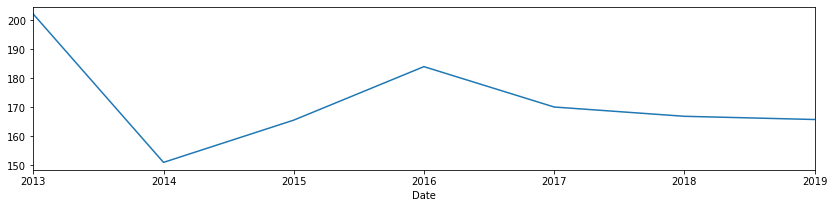

In [18]:
data_i.DJU.loc[:'2019'].resample(rule="A").mean().plot(figsize=(14,3))

<AxesSubplot:xlabel='Date'>

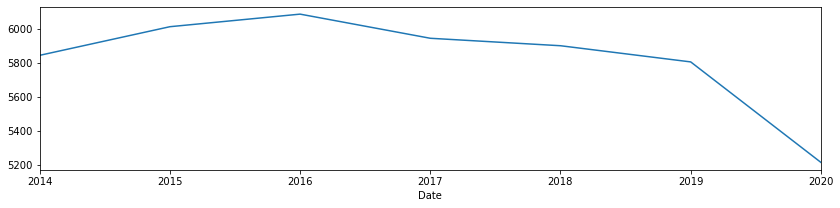

In [19]:
data_i.Conso_totale.loc['2014':].resample(rule="A").mean().plot(figsize=(14,3))

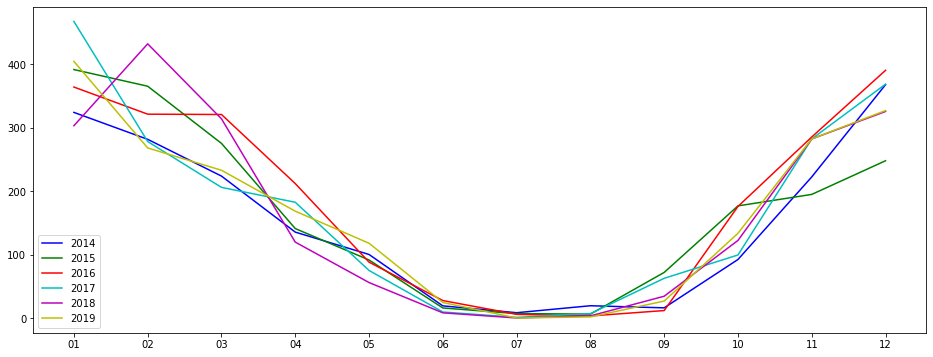

In [20]:
plt.rcParams["figure.figsize"]=[16,6]
plt.plot(data_i.loc['2014'].index.strftime("%m"),data_i.loc['2014'].DJU, color='b',label = '2014')
plt.plot(data_i.loc['2015'].index.strftime("%m"),data_i.loc['2015'].DJU, color='g',label = '2015')
plt.plot(data_i.loc['2016'].index.strftime("%m"),data_i.loc['2016'].DJU, color='r',label = '2016')
plt.plot(data_i.loc['2017'].index.strftime("%m"),data_i.loc['2017'].DJU, color='c',label = '2017')
plt.plot(data_i.loc['2018'].index.strftime("%m"),data_i.loc['2018'].DJU, color='m',label = '2018')
plt.plot(data_i.loc['2019'].index.strftime("%m"),data_i.loc['2019'].DJU, color='y',label = '2019')
plt.legend(loc='best')
plt.draw()

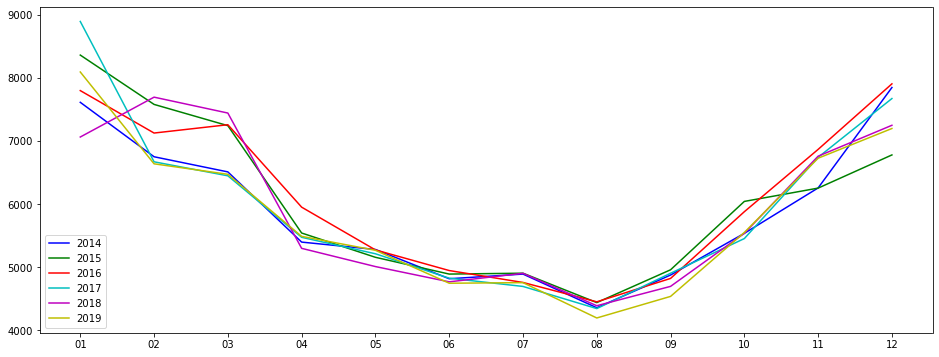

In [21]:
plt.rcParams["figure.figsize"]=[16,6]
plt.plot(data_i.loc['2014'].index.strftime("%m"),data_i.loc['2014'].Conso_totale, color='b',label = '2014')
plt.plot(data_i.loc['2015'].index.strftime("%m"),data_i.loc['2015'].Conso_totale, color='g',label = '2015')
plt.plot(data_i.loc['2016'].index.strftime("%m"),data_i.loc['2016'].Conso_totale, color='r',label = '2016')
plt.plot(data_i.loc['2017'].index.strftime("%m"),data_i.loc['2017'].Conso_totale, color='c',label = '2017')
plt.plot(data_i.loc['2018'].index.strftime("%m"),data_i.loc['2018'].Conso_totale, color='m',label = '2018')
plt.plot(data_i.loc['2019'].index.strftime("%m"),data_i.loc['2019'].Conso_totale, color='y',label = '2019')
plt.legend(loc='best')
plt.draw()

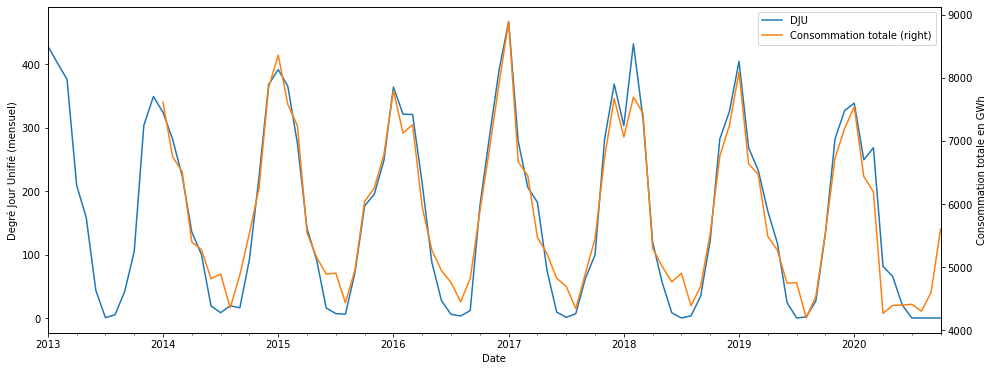

In [22]:
data_i.DJU.plot(label="DJU", legend=True)
plt.ylabel("Degré Jour Unifié (mensuel)",fontsize=10)
data_i.Conso_totale.loc['2014':].plot(secondary_y=True, label="Consommation totale", legend=True)
plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.savefig("0_0_0.jpg",bbox_inches ="tight")

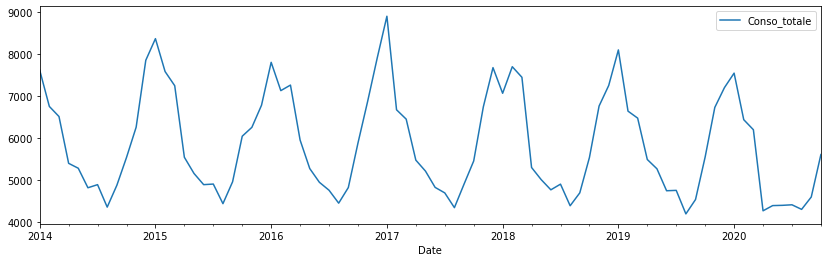

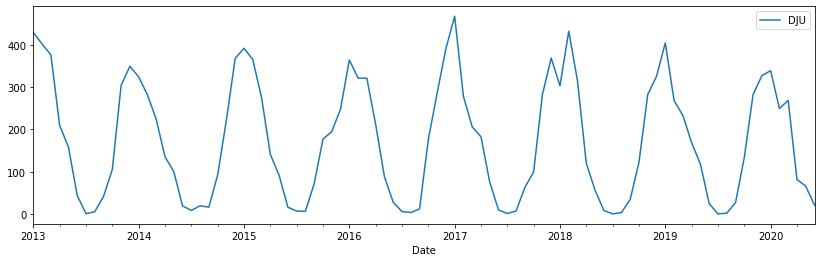

In [23]:
#plot donnees dispo
data_i.loc['2014-01':][['Conso_totale']].plot(y="Conso_totale", figsize=(14,4))
plt.savefig("0_0.jpg",bbox_inches ="tight")
data_i.loc[:'2020-06'][['DJU']].plot(y="DJU", figsize=(14,4))
plt.savefig("0_1.jpg",bbox_inches ="tight")

In [24]:
#data_tr =  data_i de 2014 à 2018, annees 'd'entrainement'
data_tr = data_i.loc['2014':'2018'].copy()
#data_te =  data_i de 2019, annee 'test'
data_te = data_i.loc['2019'].copy()

In [25]:
dfi.export(data_tr, 'data_tr.jpg',max_rows = 10)
dfi.export(data_te, 'data_te.jpg',max_rows = 10)

In [26]:
#data_i = data_i[data_i ['Conso_totale'] != 0]#certaines lignes disparaissent
#data_i = data_i[data_i ['DJU'] != 0.0]

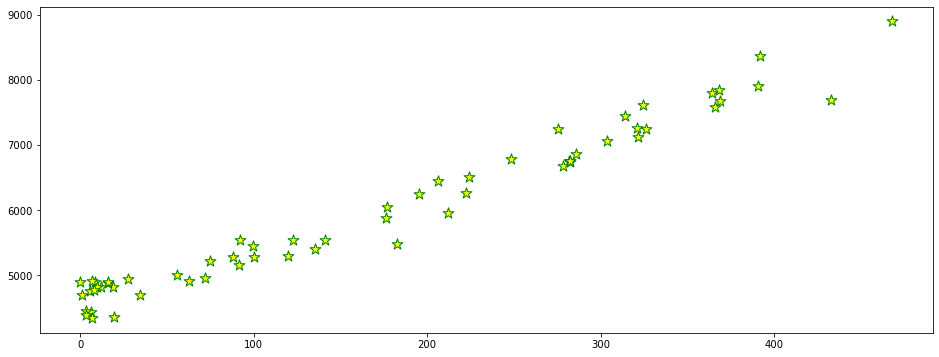

In [27]:
plt.scatter(data_tr['DJU'], data_tr['Conso_totale'], s = 130, c = 'yellow', marker = '*', edgecolors = 'green')

In [28]:
data_tr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DJU,60.0,167.486667,140.615137,0.0,19.25,138.3,283.35,467.9
Conso_totale,60.0,5956.333333,1212.132896,4342.0,4898.00,5535.0,6915.00,8894.0


In [29]:
data_tr.isna().sum().sort_values(ascending = False)

Conso_totale    0
DJU             0
dtype: int64

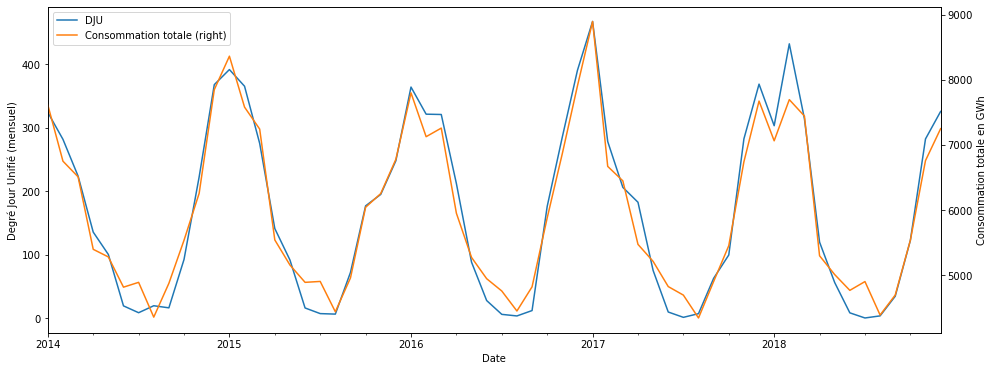

In [30]:
#données d'entrainement
data_tr.DJU.plot(label="DJU", legend=True)
plt.ylabel("Degré Jour Unifié (mensuel)",fontsize=10)
data_tr.Conso_totale.plot(secondary_y=True, label="Consommation totale", legend=True)
plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.savefig("0.jpg",bbox_inches ="tight")

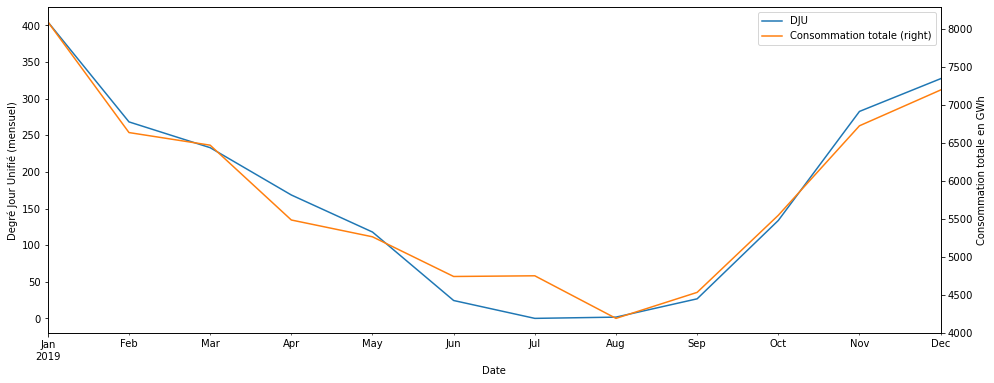

In [31]:
#données de test
data_te.DJU.plot(label="DJU", legend=True)
plt.ylabel("Degré Jour Unifié (mensuel)",fontsize=10)
data_te.Conso_totale.plot(secondary_y=True, label="Consommation totale", legend=True)
plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.draw()

In [32]:
data_tr[['Conso_totale']].groupby(pd.Grouper(freq='1Y')).agg({'Conso_totale': ['min', 'max', 'mean', 'std']}).dropna()

Conso_totale                                
                    min   max         mean          std
Date                                                   
2014-12-31         4355  7847  5842.916667  1140.665154
2015-12-31         4437  8361  6011.166667  1249.482499
2016-12-31         4449  7905  6085.083333  1256.854621
2017-12-31         4342  8894  5943.166667  1367.626732
2018-12-31         4387  7694  5899.333333  1236.555578

In [33]:
data_tr[['DJU']].groupby(pd.Grouper(freq='1Y')).agg({'DJU': ['min', 'max', 'mean', 'std']}).dropna()

DJU                               
            min    max        mean         std
Date                                          
2014-12-31  8.3  368.2  150.975000  129.480270
2015-12-31  6.1  392.0  165.541667  134.539609
2016-12-31  3.2  390.8  183.983333  151.379300
2017-12-31  1.0  467.9  170.066667  153.968228
2018-12-31  0.0  432.6  166.866667  154.787158

### 1 -Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

In [34]:
x = data_tr[['DJU']].copy()
y = data_tr[['Conso_totale']].copy()

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg = smf.ols('y~x', data=data_tr).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1590.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           7.46e-44
Time:                        16:04:44   Log-Likelihood:                -410.23
No. Observations:                  60   AIC:                             824.5
Df Residuals:                      58   BIC:                             828.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4538.1937     46.275     98.070      0.0

In [36]:
reg.params

Intercept    4538.193671
x               8.467179
dtype: float64

In [37]:
coef = reg.params[1]
data_tr['co_dju'] = data_tr['DJU'] * coef
data_tr['cons_nodju'] = data_tr['Conso_totale'] - data_tr['co_dju']
data_tr.iloc[:,:4].sort_values(by='Conso_totale').head(15)

,DJU,Conso_totale,co_dju,cons_nodju
Date,,,,
2017-08-01,6.8,4342,57.576820,4284.423180
2014-08-01,19.3,4355,163.416563,4191.583437
2018-08-01,3.3,4387,27.941692,4359.058308
2015-08-01,6.1,4437,51.649795,4385.350205
2016-08-01,3.2,4449,27.094974,4421.905026
2017-07-01,1.0,4693,8.467179,4684.532821
2018-09-01,34.3,4694,290.424255,4403.575745
2016-07-01,5.7,4756,48.262923,4707.737077
2018-06-01,8.1,4766,68.584154,4697.415846


<AxesSubplot:xlabel='Date'>

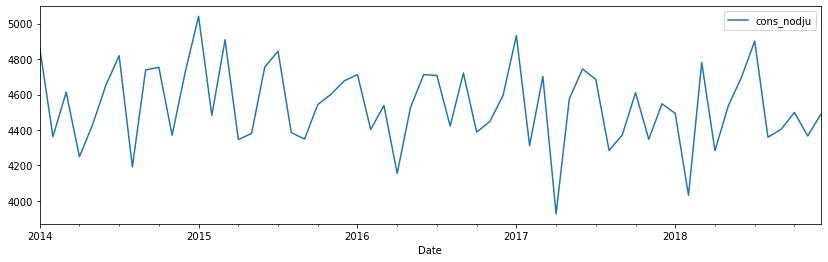

In [38]:
data_tr[['cons_nodju']].plot(figsize=(14,4))

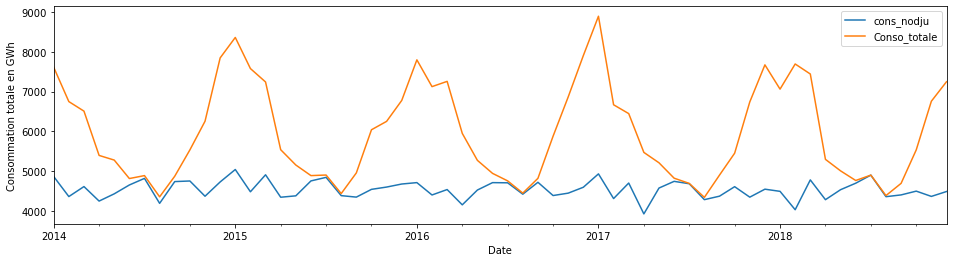

In [39]:
data_tr[['cons_nodju','Conso_totale']].plot(figsize=(16,4))
plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.savefig("Conso_totale_nodju.jpg",bbox_inches ="tight")
#(si S<=Moy : DJ=O )

<AxesSubplot:xlabel='Date'>

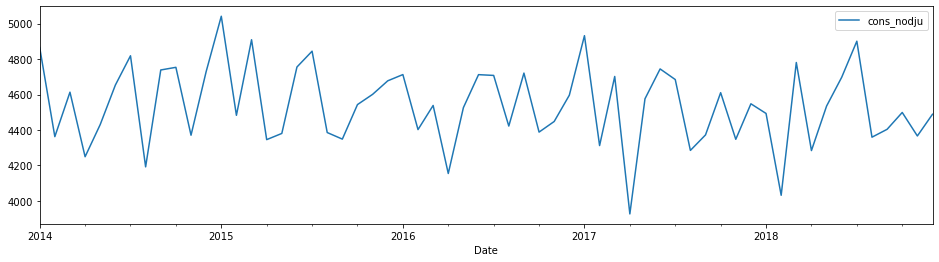

In [40]:
data_tr[['cons_nodju']].plot(figsize=(16,4))

In [41]:
data_tr.groupby(pd.Grouper(freq='1Y')).agg({'Conso_totale': ['min', 'max', 'mean', 'std']}).dropna()

Conso_totale                                
                    min   max         mean          std
Date                                                   
2014-12-31         4355  7847  5842.916667  1140.665154
2015-12-31         4437  8361  6011.166667  1249.482499
2016-12-31         4449  7905  6085.083333  1256.854621
2017-12-31         4342  8894  5943.166667  1367.626732
2018-12-31         4387  7694  5899.333333  1236.555578

In [42]:
data_tr.groupby(pd.Grouper(freq='1Y')).agg({'cons_nodju': ['min', 'max', 'mean', 'std']}).dropna()

cons_nodju                                      
                    min          max         mean         std
Date                                                         
2014-12-31  4191.583437  4865.246987  4564.584249  232.371368
2015-12-31  4345.280980  5041.865656  4609.495669  237.291296
2016-12-31  4154.111239  4720.934000  4527.263434  174.581929
2017-12-31  3925.893033  4932.206736  4503.181682  268.450331
2018-12-31  4031.098170  4901.000000  4486.443323  231.917891

In [43]:
#data_te =  data_i pour 2019, annee de test a comparer avec les previsions
data_te['co_dju'] = data_te['DJU'] * coef
data_te['cons_nodju'] = data_te['Conso_totale'] - data_te['co_dju']
dfi.export(data_te, 'data_te.jpg')

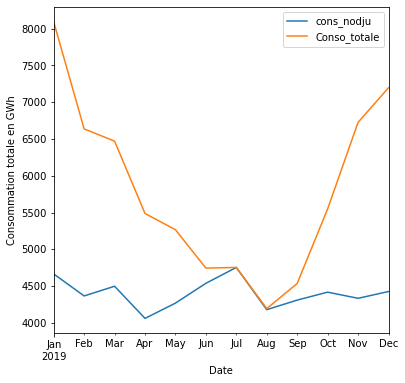

In [44]:
data_te[['cons_nodju','Conso_totale']].plot(figsize=(6,6))
plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.savefig("1_1.jpg",bbox_inches ="tight")

In [45]:
data_te.isna().sum().sort_values(ascending = False)

cons_nodju      0
co_dju          0
Conso_totale    0
DJU             0
dtype: int64

### 2 - effectuez une désaisonnalisation de la consommation que vous aurez obtenue après correction, grâce aux moyennes mobiles.

In [46]:
data_all = data_tr.copy().append(data_te.copy(), sort=False)

In [47]:
data_all

,DJU,Conso_totale,co_dju,cons_nodju
Date,,,,
2014-01-01,324.4,7612,2746.753013,4865.246987
2014-02-01,281.9,6749,2386.897887,4362.102113
2014-03-01,223.9,6509,1895.801479,4613.198521
2014-04-01,135.5,5396,1147.302815,4248.697185
2014-05-01,100.2,5279,848.411381,4430.588619
...,...,...,...,...
2019-08-01,1.7,4193,14.394205,4178.605795
2019-09-01,26.7,4535,226.073691,4308.926309
2019-10-01,133.7,5549,1132.061892,4416.938108


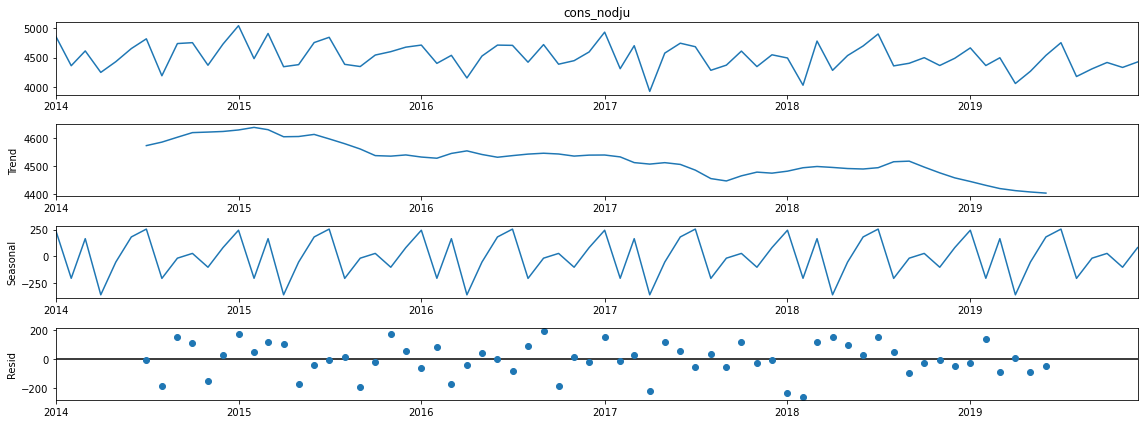

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16,6]
decomp_x = seasonal_decompose(data_all['cons_nodju'],  model='additive', period = 12)
fig = decomp_x.plot()
plt.savefig("2_0.jpg",bbox_inches ="tight")
plt.show()

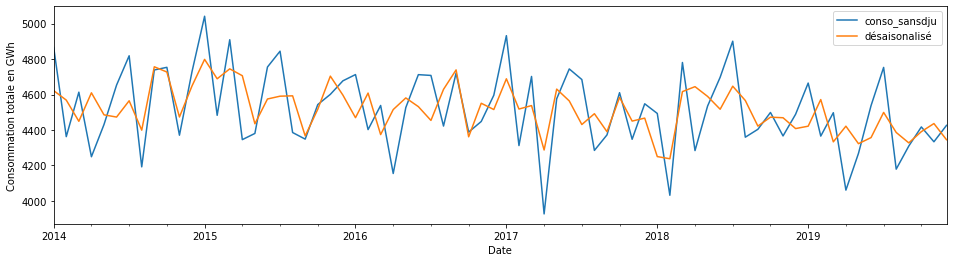

In [49]:
#desaisonalisation :
data_all['cons_nodjusea'] = data_all['cons_nodju'] - decomp_x.seasonal
data_all['cons_nodju'].plot(label='conso_sansdju',figsize=(16,4))
data_all['cons_nodjusea'].plot(label = 'désaisonalisé')
plt.legend()
plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.savefig("Conso_totale_nodju_desaisonalise.jpg",bbox_inches ="tight")

### 3 -Effectuez une prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel)sur la série temporelle.

In [50]:
 #Holt-Winters/Triple Exponential Smoothing(ADDITIVE MODELS ONLY)

#### Prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) 

In [51]:
y = data_tr[['cons_nodju']].copy()

C:\Users\multi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


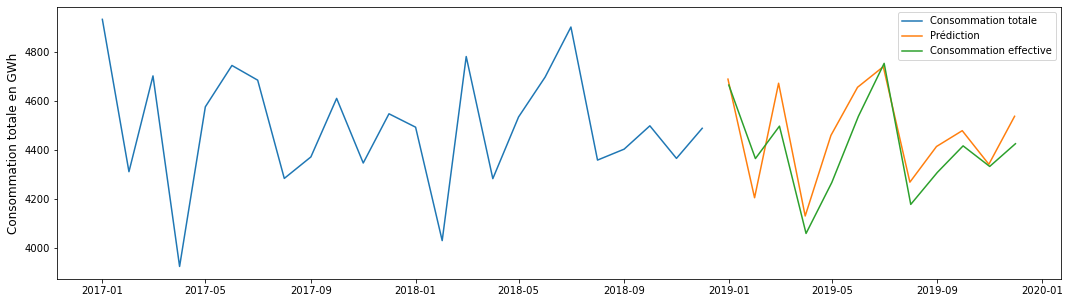

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing
hw = ExponentialSmoothing(np.asarray(y), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)
plt.figure(figsize=(18,5))
plt.plot(y.loc['2017':], label='Consommation totale')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Prédiction')
plt.plot(data_te['cons_nodju'], label='Consommation effective')
plt.ylabel("Consommation totale en GWh",fontsize=12)
plt.legend()
plt.savefig("Holt_Winters.jpg",bbox_inches ="tight")
plt.show()

In [53]:
data_te['hw_pred'] = hw_pred

In [54]:
data_te

,DJU,Conso_totale,co_dju,cons_nodju,hw_pred
Date,,,,,
2019-01-01,404.9,8093,3428.360959,4664.639041,4688.760963
2019-02-01,268.3,6637,2271.744246,4365.255754,4205.737729
2019-03-01,233.1,6471,1973.699530,4497.300470,4671.998671
2019-04-01,168.5,5487,1426.719737,4060.280263,4131.331851
2019-05-01,117.9,5266,998.280457,4267.719543,4459.668659
2019-06-01,24.4,4744,206.599179,4537.400821,4655.547246
2019-07-01,0.0,4753,0.000000,4753.000000,4739.477593
2019-08-01,1.7,4193,14.394205,4178.605795,4269.161587
2019-09-01,26.7,4535,226.073691,4308.926309,4414.382074


### Effectuez une prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode SARIMA sur la série temporelle.

Test pour la Stationnarité
Nous pouvons utiliser le test de Dickey-Fuller augmenté (unit root test).

En statistique et en économétrie, un test de Dickey-Fuller augmenté (ADF) permet de tester l'hypothèse nulle de la présence d'une racine unitaire dans un échantillon de série temporelle. L'hypothèse de rechange est différente selon la version du test utilisée, mais il s'agit habituellement de la stationnarité ou de la tendance-stationnarité.

Fondamentalement, nous essayons d'accepter l'hypothèse nulle H0 (que la série temporelle a une racine unitaire, indiquant qu'elle est non stationnaire) ou de rejeter H0 et d'opter pour l'hypothèse alternative (que la série temporelle n'a pas de racine unitaire et est stationnaire).

Nous finissons par décider cela en fonction du rendement de la valeur p.

Une petite valeur p (typiquement ≤ 0,05) indique une forte évidence contre l'hypothèse nulle, donc vous rejetez l'hypothèse nulle.

Une valeur p élevée (> 0,05) indique une faible preuve contre l'hypothèse nulle, donc vous ne pouvez pas rejeter l'hypothèse nulle.

Faisons le test du Dickey-Fuller Augmenté sur nos données :

In [55]:
#création d'une fonction from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    result = adfuller(time_series)
    print("Test de Dickey_fuller Augmenté (adf)")
    labels = ['ADF Test Statistic','p-value','#lags used','Number of observations used']
    
    for value,label in zip(result,labels):
        print(label+':'+str(value))
        
    if result[1] <= 0.05:
        print("Forte preuve contre l'hypothèse nulle")
        print("Rejette l'hypothèse nulle")
        print("Les données n'ont pas de racine unitaire et sont donc stationnaires")
    
    else:
        print("Faible évidence contre l'hypothèse nulle")
        print("Echoue à rejetter l'hypothèse nulle")
        print("Les données ont une racine unitaire et sont donc non stationnaires")

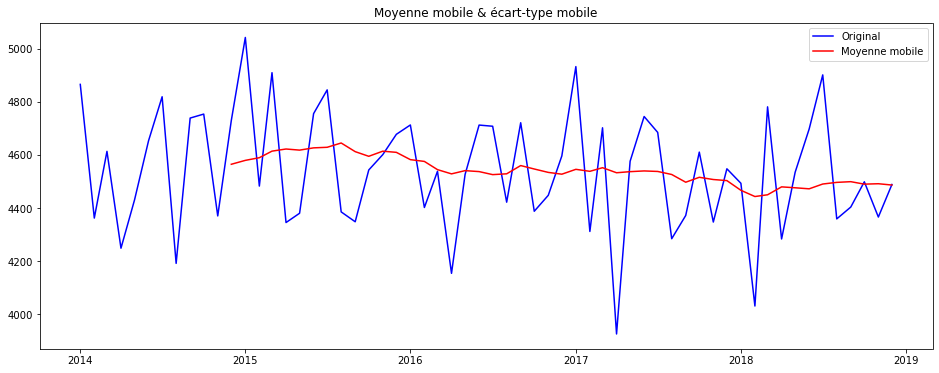

In [56]:
plt.rcParams["figure.figsize"]=[16,6]
timeseries = data_tr['cons_nodju']
rolmean = timeseries.rolling(12).mean()
rolstd = timeseries.rolling(12).std()
orig = plt.plot(timeseries, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Moyenne mobile')
plt.legend(loc='best')
plt.title('Moyenne mobile & écart-type mobile')
plt.show(block=False)

In [57]:
adf_check(data_tr['cons_nodju'])

Test de Dickey_fuller Augmenté (adf)
ADF Test Statistic:-0.9735442358946722
p-value:0.7627907411860666
#lags used:11
Number of observations used:48
Faible évidence contre l'hypothèse nulle
Echoue à rejetter l'hypothèse nulle
Les données ont une racine unitaire et sont donc non stationnaires


In [58]:
data_tr['First_difference'] = data_tr['cons_nodju'] - data_tr['cons_nodju'].shift(1)

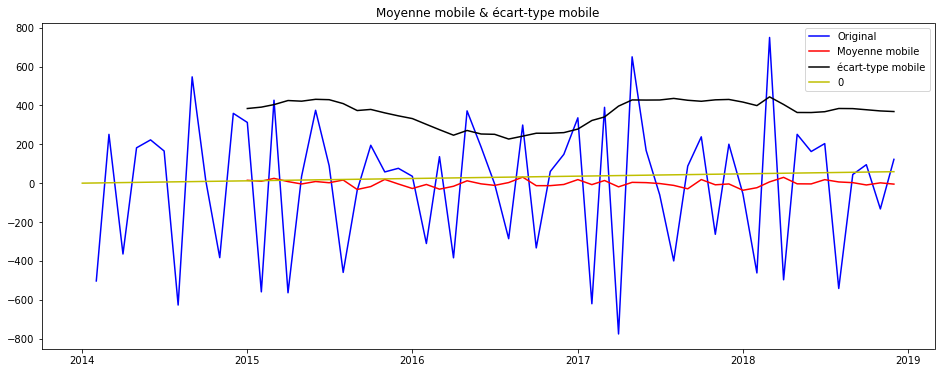

In [59]:
#premiere difference
plt.rcParams["figure.figsize"]=[16,6]
timeseries = data_tr['First_difference']
rolmean = timeseries.rolling(12).mean()
rolstd = timeseries.rolling(12).std()
orig = plt.plot(timeseries, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Moyenne mobile')
std = plt.plot(rolstd, color='black', label = 'écart-type mobile')
plt.plot(timeseries.index,pd.Series(range(len(timeseries)), index=timeseries.index), color='y',label = '0')
#pd.DataFrame({'0': [0,0]}, index=[2014, 2019]).plot.line(color='y')
plt.legend(loc='best')
plt.title('Moyenne mobile & écart-type mobile')
plt.show(block=False)

In [60]:
#data_tr['First_difference'] = data_tr['cons_nodju'] - data_tr['cons_nodju'].shift(1)
adf_check(data_tr['First_difference'].dropna())#perte 1ere valeur

Test de Dickey_fuller Augmenté (adf)
ADF Test Statistic:-4.428884196362745
p-value:0.00026377732851992945
#lags used:10
Number of observations used:48
Forte preuve contre l'hypothèse nulle
Rejette l'hypothèse nulle
Les données n'ont pas de racine unitaire et sont donc stationnaires


À partir du graphique, nous pouvons observer que la moyenne mobile s'est maintenant stabilisée et que l'écart-type mobile est également un peu lissé, indiquant que cet ensemble de données est stationnaire.

In [61]:
data_tr['Seconde_difference'] = data_tr['First_difference'] - data_tr['First_difference'].shift(1)

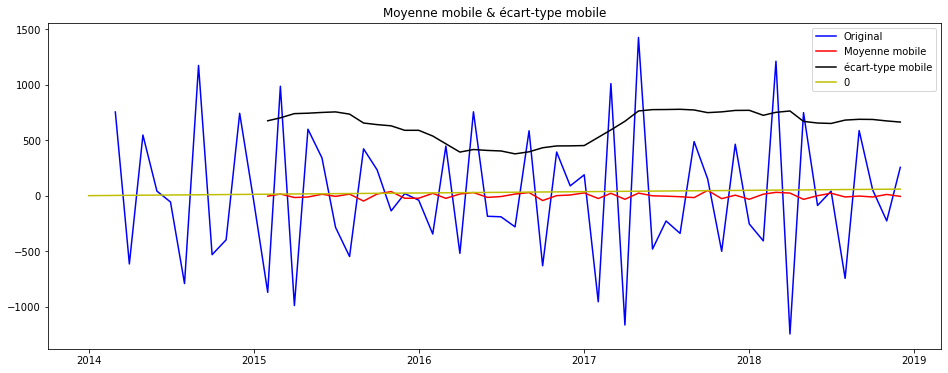

In [62]:
#Seconde_difference
plt.rcParams["figure.figsize"]=[16,6]
timeseries = data_tr['Seconde_difference']
rolmean = timeseries.rolling(12).mean()
rolstd = timeseries.rolling(12).std()
orig = plt.plot(timeseries, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Moyenne mobile')
std = plt.plot(rolstd, color='black', label = 'écart-type mobile')
plt.plot(timeseries.index,pd.Series(range(len(timeseries)), index=timeseries.index), color='y',label = '0')
plt.legend(loc='best')
plt.title('Moyenne mobile & écart-type mobile')
plt.show(block=False)

In [63]:
#data_tr['Seconde_difference'] = data_tr['First_difference'] - data_tr['First_difference'].shift(1)
adf_check(data_tr['Seconde_difference'].dropna())

Test de Dickey_fuller Augmenté (adf)
ADF Test Statistic:-3.4866647464446414
p-value:0.008336249553518487
#lags used:11
Number of observations used:46
Forte preuve contre l'hypothèse nulle
Rejette l'hypothèse nulle
Les données n'ont pas de racine unitaire et sont donc stationnaires


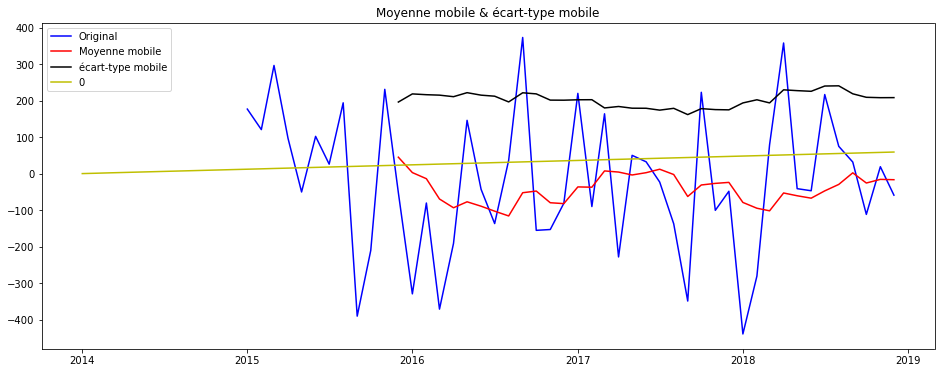

In [64]:
#différence saisonnière
data_tr['Seasonal_difference'] = data_tr['cons_nodju'] - data_tr['cons_nodju'].shift(12)
plt.rcParams["figure.figsize"]=[16,6]
timeseries = data_tr['Seasonal_difference']
rolmean = timeseries.rolling(12).mean()
rolstd = timeseries.rolling(12).std()
orig = plt.plot(timeseries, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Moyenne mobile')
std = plt.plot(rolstd, color='black', label = 'écart-type mobile')
plt.plot(timeseries.index,pd.Series(range(len(timeseries)), index=timeseries.index), color='y',label = '0')
plt.legend(loc='best')
plt.title('Moyenne mobile & écart-type mobile')
plt.show(block=False)

In [65]:
#data_tr['Seasonal_difference'] = data_tr['cons_nodju'] - data_tr['cons_nodju'].shift(12)
adf_check(data_tr['Seasonal_difference'].dropna())

Test de Dickey_fuller Augmenté (adf)
ADF Test Statistic:-6.385223109934363
p-value:2.172594723586965e-08
#lags used:0
Number of observations used:47
Forte preuve contre l'hypothèse nulle
Rejette l'hypothèse nulle
Les données n'ont pas de racine unitaire et sont donc stationnaires


In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\multi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


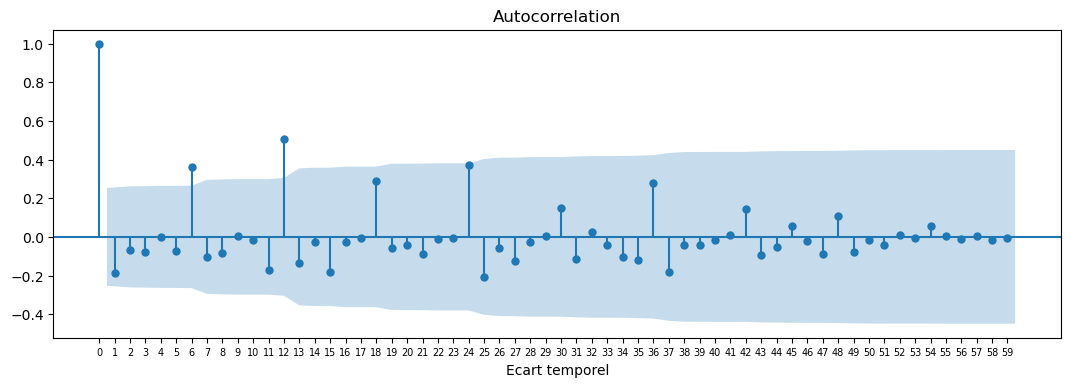

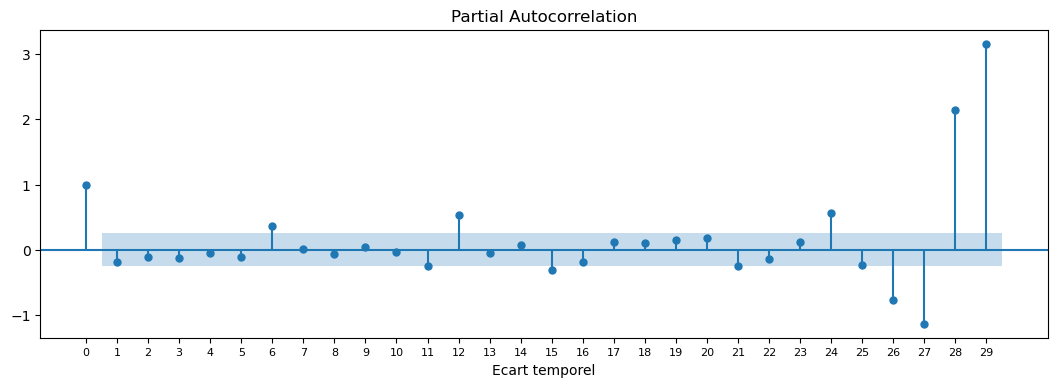

In [67]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"]=[13,4]

plot_acf(data_tr['cons_nodju'],lags=59)
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(60),fontsize = 7)
plt.savefig("auto_0.jpg",bbox_inches ="tight")
plot_pacf(data_tr['cons_nodju'].dropna(),lags=29)
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(30),fontsize = 8)
plt.savefig("pauto_0.jpg",bbox_inches ="tight")
plt.draw()
#La sortie ACF ne présente pas une décroissance lente, ce qui traduit une stationnarité

In [68]:
#data['First_difference'] = data['cons_nodju'] - data['cons_nodju'].shift(1)

C:\Users\multi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


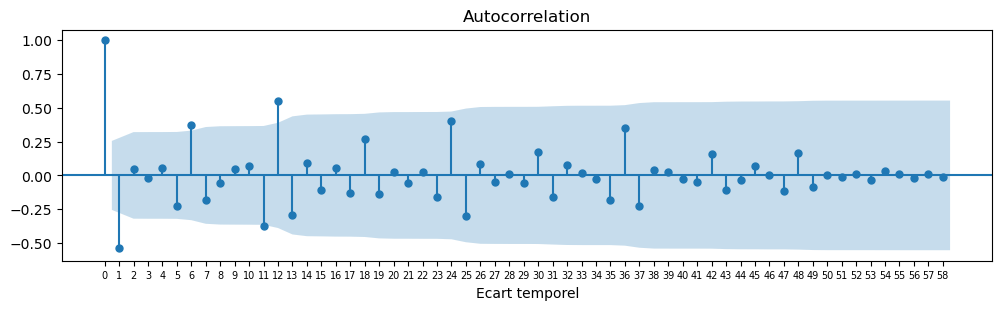

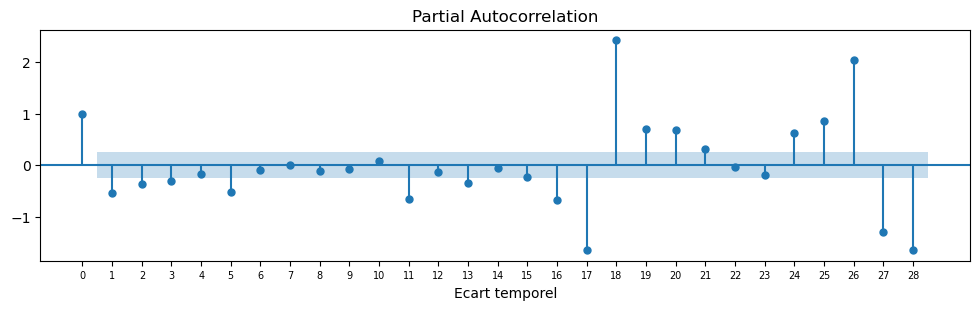

In [69]:
#model 1 man
plt.rcParams["figure.figsize"] = (12,3)
plot_acf(data_tr['First_difference'].dropna(),lags=58)#dessin statmodel 
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(59),fontsize = 7)
plt.savefig("auto_1.jpg",bbox_inches ="tight")
plot_pacf(data_tr['First_difference'].dropna(),lags=28)
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(29),fontsize = 7)
plt.savefig("pauto_1.jpg",bbox_inches ="tight")
plt.show()
##data['First_difference']#testéé stationnaire
#autocorrelation negative au 1er retard, utiliser MA moyennes mobiles
#forte baisse pacf k=1
#order=[3,1,6] ..p de pacf a 3, d = 1, 1 decal pour station , q=6 acf

In [70]:
#data_tr['Seconde_difference'] = data_tr['First_difference'] - data_tr['First_difference'].shift(1)

C:\Users\multi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


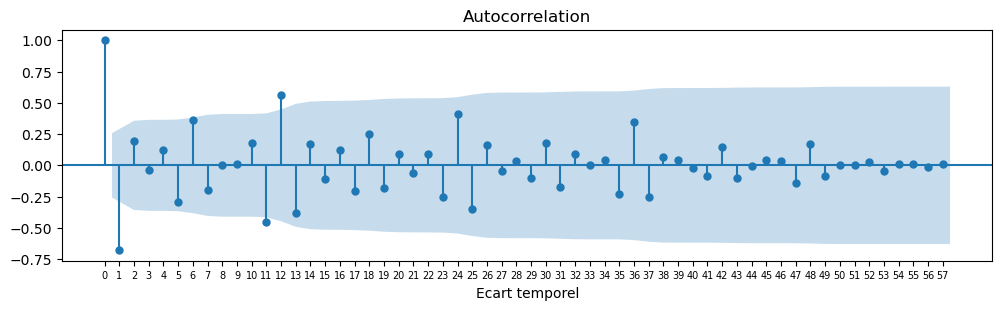

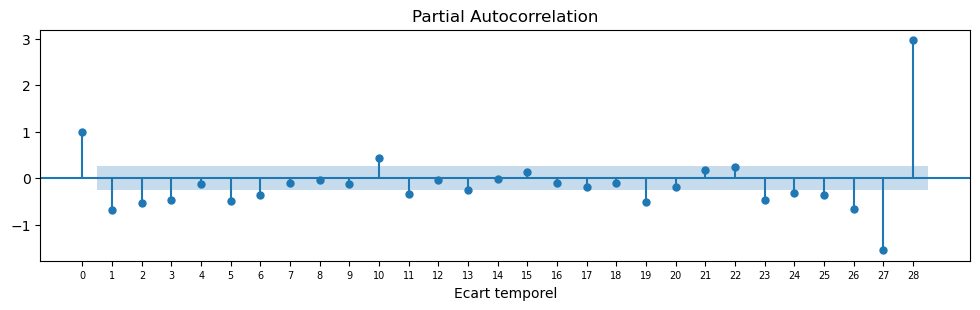

In [71]:
#model auto
plt.rcParams["figure.figsize"] = (12,3)
plot_acf(data_tr['Seconde_difference'].dropna(),lags=57)#dessin statmodel 
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(58),fontsize = 7)
plt.savefig("auto_2.jpg",bbox_inches ="tight")
plot_pacf(data_tr['Seconde_difference'].dropna(),lags=28)
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(29),fontsize = 7)
plt.savefig("pauto_2.jpg",bbox_inches ="tight")
plt.show()

In [72]:
#data['Seasonal_difference'] = data['cons_nodju'] - data['cons_nodju'].shift(12)

C:\Users\multi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


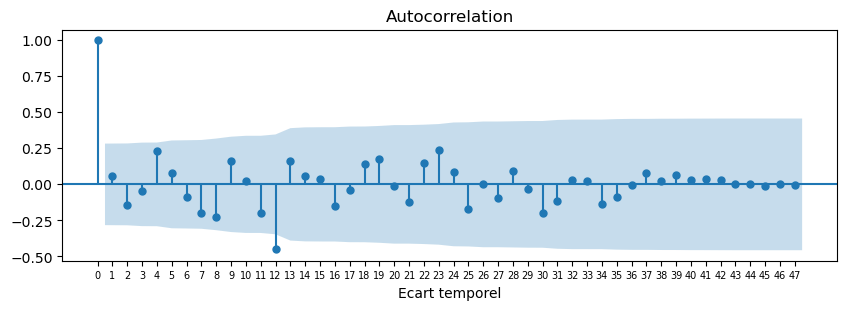

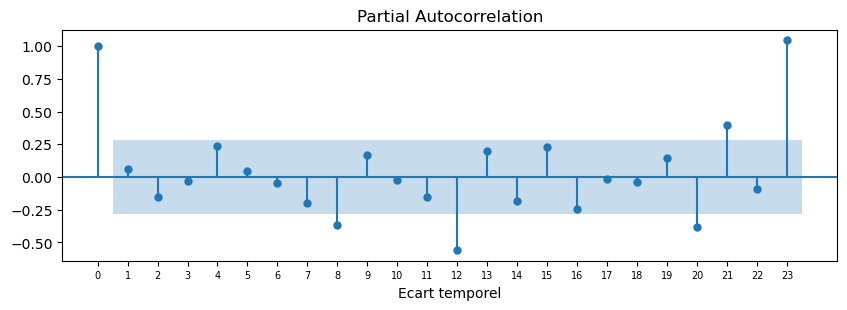

In [73]:
#model 1 
plt.rcParams["figure.figsize"] = (10,3)
plot_acf(data_tr['Seasonal_difference'].dropna(),lags=47)#dessin statmodel 
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(48),fontsize = 7)
plt.savefig("auto_12.jpg",bbox_inches ="tight")
plot_pacf(data_tr['Seasonal_difference'].dropna(),lags=23)
plt.xlabel("Ecart temporel",fontsize=10)
plt.xticks(range(24),fontsize = 7)
plt.savefig("pauto_12.jpg",bbox_inches ="tight")
plt.show()
#test adf stationnaire
##autocorrelation positive au 1er retard, utiliser ar
#forte baisse a k=1 pacf..model AR k ?
#order=[1,0,1]P = 1 ,D=0, Q=1
# ou 0 0 0 ..meilleurs resultats

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(np.asarray(data_tr['cons_nodju']), order=(3,1,6),seasonal_order = (1,0,1,12))
result1 = model1.fit()
print(result1.summary())
#sarimax_manuel

C:\Users\multi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(3, 1, 6)x(1, 0, [1], 12)   Log Likelihood                -395.575
Date:                              Fri, 15 Jan 2021   AIC                            815.150
Time:                                      16:04:54   BIC                            840.081
Sample:                                           0   HQIC                           824.882
                                               - 60                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4844      1.245     -1.193      0.233      -3.924       0.955
ar.L2         -1.50

C:\Users\multi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
data_te['sarima_man'] = result1.forecast(12)

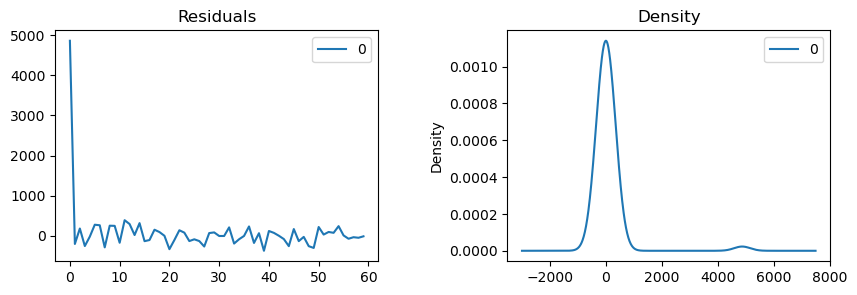

                 0
count    60.000000
mean     77.539427
std     654.294531
min    -378.993822
25%    -136.337945
50%      -6.448484
75%     136.861642
max    4865.246987
coefficient d'asymetrie: 6.837703462443205
coefficient d'aplatissement: 50.659579138636055
p-value :  5.246683435069588e-15 ,la p-value est inférieure à un niveau alpha choisi (0.05), alors l'hypothèse nulle est rejetée (i.e. il est improbable d'obtenir de telles données en supposant qu'elles soient normalement distribuées).


In [76]:
from scipy.stats import shapiro
#Plotting the residual density and estimating its distribution
residuals = pd.DataFrame(result1.resid)
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(hspace=0.3, wspace=0.4)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())
print("coefficient d'asymetrie:",residuals.skew()[0])
print("coefficient d'aplatissement:",residuals.kurt()[0])
from scipy.stats import shapiro
p_value = shapiro(residuals)[1]
if p_value <= 0.05:
    print("p-value : ",p_value, ",la p-value est inférieure à un niveau alpha choisi (0.05), alors l'hypothèse nulle est rejetée (i.e. il est improbable d'obtenir de telles données en supposant qu'elles soient normalement distribuées).")
else :
    print("p-value : ",p_value, ",la p-value est supérieure au niveau alpha choisi (0.05), alors on ne doit pas rejeter l'hypothèse nulle. La valeur de la p-value obtenue ne présuppose en rien de la nature de la distribution des données.")

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

p_values = range(0,7)
d_values = range(0,3)
q_values = range(0,7)

P_values = range(0,3)
D_values = range(0,3)
Q_values = range(0,3)

p_min = 0
d_min = 0
q_min = 0

P_min = 0
D_min = 0
Q_min = 0

error_min = 10000000000

train,test = np.array(data_tr['cons_nodju']),np.array(data_te['cons_nodju'])

for p in p_values:
    for d in d_values:
        for q in q_values:
            der = (p,d,q)
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                                   
                        try:

                            model = SARIMAX(train, order = der , seasonal_order=(P,D,Q,12))

                            model_fit = model.fit()

                            pred_y = model_fit.forecast(12)

                            error = np.sqrt(mean_squared_error(test,pred_y))

                            print('SARIMA%s RMSE = %.2f'% (der,error),P,D,Q)
                            if error < error_min:

                                error_min = error
                                ord = der
                                P_min = P
                                D_min = D
                                Q_min = Q


                        except:
                            
                            print('erreur p d q :', der,P,D,Q, error)
                            continue
                    
print('valeurs trouvées :',ord,P_min,D_min,Q_min,'RMSE:',error_min)

SARIMA(0, 0, 0) RMSE = 4404.72 0 0 0
SARIMA(0, 0, 0) RMSE = 2190.51 0 0 1
SARIMA(0, 0, 0) RMSE = 1300.20 0 0 2
SARIMA(0, 0, 0) RMSE = 192.20 0 1 0
SARIMA(0, 0, 0) RMSE = 142.84 0 1 1
SARIMA(0, 0, 0) RMSE = 142.07 0 1 2
SARIMA(0, 0, 0) RMSE = 353.64 0 2 0
SARIMA(0, 0, 0) RMSE = 258.88 0 2 1
SARIMA(0, 0, 0) RMSE = 248.48 0 2 2
SARIMA(0, 0, 0) RMSE = 190.31 1 0 0
SARIMA(0, 0, 0) RMSE = 149.57 1 0 1
SARIMA(0, 0, 0) RMSE = 143.62 1 0 2
SARIMA(0, 0, 0) RMSE = 152.11 1 1 0
SARIMA(0, 0, 0) RMSE = 141.99 1 1 1
SARIMA(0, 0, 0) RMSE = 141.66 1 1 2
SARIMA(0, 0, 0) RMSE = 270.59 1 2 0
SARIMA(0, 0, 0) RMSE = 249.50 1 2 1
SARIMA(0, 0, 0) RMSE = 248.61 1 2 2
SARIMA(0, 0, 0) RMSE = 148.58 2 0 0
SARIMA(0, 0, 0) RMSE = 145.11 2 0 1
SARIMA(0, 0, 0) RMSE = 150.99 2 0 2
SARIMA(0, 0, 0) RMSE = 145.31 2 1 0
SARIMA(0, 0, 0) RMSE = 141.03 2 1 1
SARIMA(0, 0, 0) RMSE = 142.29 2 1 2
SARIMA(0, 0, 0) RMSE = 248.69 2 2 0
SARIMA(0, 0, 0) RMSE = 260.25 2 2 1
SARIMA(0, 0, 0) RMSE = 248.50 2 2 2
SARIMA(0, 0, 1) RMSE = 42

SARIMA(0, 1, 1) RMSE = 143.97 1 0 2
SARIMA(0, 1, 1) RMSE = 127.24 1 1 0
SARIMA(0, 1, 1) RMSE = 100.57 1 1 1
SARIMA(0, 1, 1) RMSE = 117.58 1 1 2
SARIMA(0, 1, 1) RMSE = 247.90 1 2 0
SARIMA(0, 1, 1) RMSE = 170.49 1 2 1
SARIMA(0, 1, 1) RMSE = 157.82 1 2 2
SARIMA(0, 1, 1) RMSE = 142.79 2 0 0
SARIMA(0, 1, 1) RMSE = 143.53 2 0 1
SARIMA(0, 1, 1) RMSE = 152.01 2 0 2
SARIMA(0, 1, 1) RMSE = 108.77 2 1 0
SARIMA(0, 1, 1) RMSE = 104.52 2 1 1
SARIMA(0, 1, 1) RMSE = 101.73 2 1 2
SARIMA(0, 1, 1) RMSE = 192.15 2 2 0
SARIMA(0, 1, 1) RMSE = 162.90 2 2 1
SARIMA(0, 1, 1) RMSE = 170.48 2 2 2
SARIMA(0, 1, 2) RMSE = 215.10 0 0 0
SARIMA(0, 1, 2) RMSE = 208.61 0 0 1
SARIMA(0, 1, 2) RMSE = 159.40 0 0 2
SARIMA(0, 1, 2) RMSE = 186.42 0 1 0
SARIMA(0, 1, 2) RMSE = 96.57 0 1 1
SARIMA(0, 1, 2) RMSE = 104.07 0 1 2
SARIMA(0, 1, 2) RMSE = 360.56 0 2 0
SARIMA(0, 1, 2) RMSE = 213.41 0 2 1
SARIMA(0, 1, 2) RMSE = 160.11 0 2 2
SARIMA(0, 1, 2) RMSE = 174.45 1 0 0
SARIMA(0, 1, 2) RMSE = 111.80 1 0 1
SARIMA(0, 1, 2) RMSE = 151.40

SARIMA(0, 2, 2) RMSE = 291.16 2 2 0
SARIMA(0, 2, 2) RMSE = 434.71 2 2 1
SARIMA(0, 2, 2) RMSE = 256.80 2 2 2
SARIMA(0, 2, 3) RMSE = 191.77 0 0 0
SARIMA(0, 2, 3) RMSE = 188.07 0 0 1
SARIMA(0, 2, 3) RMSE = 131.94 0 0 2
SARIMA(0, 2, 3) RMSE = 175.69 0 1 0
SARIMA(0, 2, 3) RMSE = 76.04 0 1 1
SARIMA(0, 2, 3) RMSE = 91.60 0 1 2
SARIMA(0, 2, 3) RMSE = 334.60 0 2 0
SARIMA(0, 2, 3) RMSE = 349.50 0 2 1
SARIMA(0, 2, 3) RMSE = 291.47 0 2 2
SARIMA(0, 2, 3) RMSE = 157.56 1 0 0
SARIMA(0, 2, 3) RMSE = 103.52 1 0 1
SARIMA(0, 2, 3) RMSE = 91.37 1 0 2
SARIMA(0, 2, 3) RMSE = 120.12 1 1 0
SARIMA(0, 2, 3) RMSE = 84.21 1 1 1
SARIMA(0, 2, 3) RMSE = 144.49 1 1 2
SARIMA(0, 2, 3) RMSE = 287.51 1 2 0
SARIMA(0, 2, 3) RMSE = 268.17 1 2 1
SARIMA(0, 2, 3) RMSE = 369.64 1 2 2
SARIMA(0, 2, 3) RMSE = 121.41 2 0 0
SARIMA(0, 2, 3) RMSE = 437.40 2 0 1
SARIMA(0, 2, 3) RMSE = 99.26 2 0 2
SARIMA(0, 2, 3) RMSE = 96.29 2 1 0
SARIMA(0, 2, 3) RMSE = 91.64 2 1 1
SARIMA(0, 2, 3) RMSE = 166.33 2 1 2
SARIMA(0, 2, 3) RMSE = 307.95 2 2 0

SARIMA(1, 0, 4) RMSE = 111.11 1 0 1
SARIMA(1, 0, 4) RMSE = 122.87 1 0 2
SARIMA(1, 0, 4) RMSE = 151.86 1 1 0
SARIMA(1, 0, 4) RMSE = 136.09 1 1 1
SARIMA(1, 0, 4) RMSE = 133.44 1 1 2
SARIMA(1, 0, 4) RMSE = 278.03 1 2 0
SARIMA(1, 0, 4) RMSE = 268.11 1 2 1
SARIMA(1, 0, 4) RMSE = 267.62 1 2 2
SARIMA(1, 0, 4) RMSE = 120.80 2 0 0
SARIMA(1, 0, 4) RMSE = 103.09 2 0 1
SARIMA(1, 0, 4) RMSE = 110.04 2 0 2
SARIMA(1, 0, 4) RMSE = 144.98 2 1 0
SARIMA(1, 0, 4) RMSE = 133.07 2 1 1
SARIMA(1, 0, 4) RMSE = 138.33 2 1 2
SARIMA(1, 0, 4) RMSE = 263.98 2 2 0
SARIMA(1, 0, 4) RMSE = 277.96 2 2 1
SARIMA(1, 0, 4) RMSE = 266.39 2 2 2
SARIMA(1, 0, 5) RMSE = 219.62 0 0 0
SARIMA(1, 0, 5) RMSE = 195.56 0 0 1
SARIMA(1, 0, 5) RMSE = 153.41 0 0 2
SARIMA(1, 0, 5) RMSE = 190.14 0 1 0
SARIMA(1, 0, 5) RMSE = 138.51 0 1 1
SARIMA(1, 0, 5) RMSE = 140.49 0 1 2
SARIMA(1, 0, 5) RMSE = 311.26 0 2 0
SARIMA(1, 0, 5) RMSE = 233.77 0 2 1
SARIMA(1, 0, 5) RMSE = 199.53 0 2 2
SARIMA(1, 0, 5) RMSE = 164.33 1 0 0
SARIMA(1, 0, 5) RMSE = 117.2

SARIMA(1, 1, 5) RMSE = 99.05 2 1 1
SARIMA(1, 1, 5) RMSE = 105.99 2 1 2
SARIMA(1, 1, 5) RMSE = 217.93 2 2 0
SARIMA(1, 1, 5) RMSE = 170.92 2 2 1
SARIMA(1, 1, 5) RMSE = 155.76 2 2 2
SARIMA(1, 1, 6) RMSE = 196.68 0 0 0
SARIMA(1, 1, 6) RMSE = 200.99 0 0 1
SARIMA(1, 1, 6) RMSE = 160.30 0 0 2
SARIMA(1, 1, 6) RMSE = 189.68 0 1 0
SARIMA(1, 1, 6) RMSE = 97.40 0 1 1
SARIMA(1, 1, 6) RMSE = 110.04 0 1 2
SARIMA(1, 1, 6) RMSE = 295.29 0 2 0
SARIMA(1, 1, 6) RMSE = 288.73 0 2 1
SARIMA(1, 1, 6) RMSE = 166.15 0 2 2
SARIMA(1, 1, 6) RMSE = 172.73 1 0 0
SARIMA(1, 1, 6) RMSE = 141.51 1 0 1
SARIMA(1, 1, 6) RMSE = 141.13 1 0 2
SARIMA(1, 1, 6) RMSE = 126.33 1 1 0
SARIMA(1, 1, 6) RMSE = 104.21 1 1 1
SARIMA(1, 1, 6) RMSE = 101.32 1 1 2
SARIMA(1, 1, 6) RMSE = 257.18 1 2 0
SARIMA(1, 1, 6) RMSE = 170.84 1 2 1
SARIMA(1, 1, 6) RMSE = 155.68 1 2 2
SARIMA(1, 1, 6) RMSE = 141.30 2 0 0
SARIMA(1, 1, 6) RMSE = 140.05 2 0 1
SARIMA(1, 1, 6) RMSE = 147.31 2 0 2
SARIMA(1, 1, 6) RMSE = 110.16 2 1 0
SARIMA(1, 1, 6) RMSE = 126.41 

SARIMA(2, 0, 0) RMSE = 228.44 0 2 2
SARIMA(2, 0, 0) RMSE = 138.23 1 0 0
SARIMA(2, 0, 0) RMSE = 75.30 1 0 1
SARIMA(2, 0, 0) RMSE = 81.05 1 0 2
SARIMA(2, 0, 0) RMSE = 151.08 1 1 0
SARIMA(2, 0, 0) RMSE = 140.61 1 1 1
SARIMA(2, 0, 0) RMSE = 140.35 1 1 2
SARIMA(2, 0, 0) RMSE = 262.54 1 2 0
SARIMA(2, 0, 0) RMSE = 229.30 1 2 1
SARIMA(2, 0, 0) RMSE = 236.97 1 2 2
SARIMA(2, 0, 0) RMSE = 103.03 2 0 0
SARIMA(2, 0, 0) RMSE = 73.54 2 0 1
SARIMA(2, 0, 0) RMSE = 75.25 2 0 2
SARIMA(2, 0, 0) RMSE = 144.94 2 1 0
SARIMA(2, 0, 0) RMSE = 139.93 2 1 1
SARIMA(2, 0, 0) RMSE = 140.46 2 1 2
SARIMA(2, 0, 0) RMSE = 232.22 2 2 0
SARIMA(2, 0, 0) RMSE = 235.46 2 2 1
SARIMA(2, 0, 0) RMSE = 233.10 2 2 2
SARIMA(2, 0, 1) RMSE = 218.39 0 0 0
SARIMA(2, 0, 1) RMSE = 207.62 0 0 1
SARIMA(2, 0, 1) RMSE = 147.48 0 0 2
SARIMA(2, 0, 1) RMSE = 192.06 0 1 0
SARIMA(2, 0, 1) RMSE = 138.47 0 1 1
SARIMA(2, 0, 1) RMSE = 137.60 0 1 2
SARIMA(2, 0, 1) RMSE = 352.85 0 2 0
SARIMA(2, 0, 1) RMSE = 233.20 0 2 1
SARIMA(2, 0, 1) RMSE = 201.14 0 

SARIMA(2, 1, 1) RMSE = 152.57 2 0 2
SARIMA(2, 1, 1) RMSE = 108.63 2 1 0
SARIMA(2, 1, 1) RMSE = 120.39 2 1 1
SARIMA(2, 1, 1) RMSE = 102.35 2 1 2
SARIMA(2, 1, 1) RMSE = 194.57 2 2 0
SARIMA(2, 1, 1) RMSE = 182.41 2 2 1
SARIMA(2, 1, 1) RMSE = 168.18 2 2 2
SARIMA(2, 1, 2) RMSE = 219.41 0 0 0
SARIMA(2, 1, 2) RMSE = 203.62 0 0 1
SARIMA(2, 1, 2) RMSE = 150.69 0 0 2
SARIMA(2, 1, 2) RMSE = 172.89 0 1 0
SARIMA(2, 1, 2) RMSE = 94.49 0 1 1
SARIMA(2, 1, 2) RMSE = 104.40 0 1 2
SARIMA(2, 1, 2) RMSE = 296.84 0 2 0
SARIMA(2, 1, 2) RMSE = 266.84 0 2 1
SARIMA(2, 1, 2) RMSE = 161.81 0 2 2
SARIMA(2, 1, 2) RMSE = 174.69 1 0 0
SARIMA(2, 1, 2) RMSE = 151.59 1 0 1
SARIMA(2, 1, 2) RMSE = 102.01 1 0 2
SARIMA(2, 1, 2) RMSE = 126.01 1 1 0
SARIMA(2, 1, 2) RMSE = 98.69 1 1 1
SARIMA(2, 1, 2) RMSE = 93.87 1 1 2
SARIMA(2, 1, 2) RMSE = 245.44 1 2 0
SARIMA(2, 1, 2) RMSE = 167.90 1 2 1
SARIMA(2, 1, 2) RMSE = 251.11 1 2 2
SARIMA(2, 1, 2) RMSE = 116.42 2 0 0
SARIMA(2, 1, 2) RMSE = 100.98 2 0 1
SARIMA(2, 1, 2) RMSE = 138.69 2

SARIMA(2, 2, 3) RMSE = 183.22 0 1 2
SARIMA(2, 2, 3) RMSE = 299.05 0 2 0
SARIMA(2, 2, 3) RMSE = 324.59 0 2 1
SARIMA(2, 2, 3) RMSE = 304.26 0 2 2
SARIMA(2, 2, 3) RMSE = 156.65 1 0 0
SARIMA(2, 2, 3) RMSE = 99.97 1 0 1
SARIMA(2, 2, 3) RMSE = 97.70 1 0 2
SARIMA(2, 2, 3) RMSE = 125.21 1 1 0
SARIMA(2, 2, 3) RMSE = 157.76 1 1 1
SARIMA(2, 2, 3) RMSE = 89.08 1 1 2
SARIMA(2, 2, 3) RMSE = 266.49 1 2 0
SARIMA(2, 2, 3) RMSE = 303.75 1 2 1
SARIMA(2, 2, 3) RMSE = 297.63 1 2 2
SARIMA(2, 2, 3) RMSE = 109.38 2 0 0
SARIMA(2, 2, 3) RMSE = 156824.43 2 0 1
SARIMA(2, 2, 3) RMSE = 103.22 2 0 2
SARIMA(2, 2, 3) RMSE = 171.42 2 1 0
SARIMA(2, 2, 3) RMSE = 125.28 2 1 1
SARIMA(2, 2, 3) RMSE = 159.27 2 1 2
SARIMA(2, 2, 3) RMSE = 328.70 2 2 0
SARIMA(2, 2, 3) RMSE = 341.74 2 2 1
SARIMA(2, 2, 3) RMSE = 303.33 2 2 2
SARIMA(2, 2, 4) RMSE = 174.53 0 0 0
SARIMA(2, 2, 4) RMSE = 191.58 0 0 1
SARIMA(2, 2, 4) RMSE = 191.07 0 0 2
SARIMA(2, 2, 4) RMSE = 205.91 0 1 0
SARIMA(2, 2, 4) RMSE = 114.71 0 1 1
SARIMA(2, 2, 4) RMSE = 162.1

SARIMA(3, 0, 4) RMSE = 221.44 1 2 1
SARIMA(3, 0, 4) RMSE = 233.53 1 2 2
SARIMA(3, 0, 4) RMSE = 139.26 2 0 0
SARIMA(3, 0, 4) RMSE = 121.48 2 0 1
SARIMA(3, 0, 4) RMSE = 127.65 2 0 2
SARIMA(3, 0, 4) RMSE = 145.89 2 1 0
SARIMA(3, 0, 4) RMSE = 143.90 2 1 1
SARIMA(3, 0, 4) RMSE = 144.68 2 1 2
SARIMA(3, 0, 4) RMSE = 231.90 2 2 0
SARIMA(3, 0, 4) RMSE = 234.07 2 2 1
SARIMA(3, 0, 4) RMSE = 234.51 2 2 2
SARIMA(3, 0, 5) RMSE = 201.64 0 0 0
SARIMA(3, 0, 5) RMSE = 195.92 0 0 1
SARIMA(3, 0, 5) RMSE = 165.57 0 0 2
SARIMA(3, 0, 5) RMSE = 180.34 0 1 0
SARIMA(3, 0, 5) RMSE = 144.90 0 1 1
SARIMA(3, 0, 5) RMSE = 145.48 0 1 2
SARIMA(3, 0, 5) RMSE = 298.59 0 2 0
SARIMA(3, 0, 5) RMSE = 275.75 0 2 1
SARIMA(3, 0, 5) RMSE = 276.41 0 2 2
SARIMA(3, 0, 5) RMSE = 171.66 1 0 0
SARIMA(3, 0, 5) RMSE = 126.81 1 0 1
SARIMA(3, 0, 5) RMSE = 141.08 1 0 2
SARIMA(3, 0, 5) RMSE = 148.76 1 1 0
SARIMA(3, 0, 5) RMSE = 143.76 1 1 1
SARIMA(3, 0, 5) RMSE = 143.61 1 1 2
SARIMA(3, 0, 5) RMSE = 279.91 1 2 0
SARIMA(3, 0, 5) RMSE = 275.7

SARIMA(3, 1, 6) RMSE = 209.76 0 0 0
SARIMA(3, 1, 6) RMSE = 199.69 0 0 1
SARIMA(3, 1, 6) RMSE = 163.92 0 0 2
SARIMA(3, 1, 6) RMSE = 187.78 0 1 0
SARIMA(3, 1, 6) RMSE = 132.43 0 1 1
SARIMA(3, 1, 6) RMSE = 131.23 0 1 2
SARIMA(3, 1, 6) RMSE = 307.08 0 2 0
SARIMA(3, 1, 6) RMSE = 240.50 0 2 1
SARIMA(3, 1, 6) RMSE = 226.56 0 2 2
SARIMA(3, 1, 6) RMSE = 163.81 1 0 0
SARIMA(3, 1, 6) RMSE = 134.73 1 0 1
SARIMA(3, 1, 6) RMSE = 135.41 1 0 2
SARIMA(3, 1, 6) RMSE = 148.53 1 1 0
SARIMA(3, 1, 6) RMSE = 132.15 1 1 1
SARIMA(3, 1, 6) RMSE = 129.60 1 1 2
SARIMA(3, 1, 6) RMSE = 256.53 1 2 0
SARIMA(3, 1, 6) RMSE = 223.28 1 2 1
SARIMA(3, 1, 6) RMSE = 228.86 1 2 2
SARIMA(3, 1, 6) RMSE = 139.62 2 0 0
SARIMA(3, 1, 6) RMSE = 129.90 2 0 1
SARIMA(3, 1, 6) RMSE = 130.39 2 0 2
SARIMA(3, 1, 6) RMSE = 132.84 2 1 0
SARIMA(3, 1, 6) RMSE = 136.61 2 1 1
SARIMA(3, 1, 6) RMSE = 128.50 2 1 2
SARIMA(3, 1, 6) RMSE = 226.41 2 2 0
SARIMA(3, 1, 6) RMSE = 236.07 2 2 1
SARIMA(3, 1, 6) RMSE = 229.31 2 2 2
SARIMA(3, 2, 0) RMSE = 277.4

SARIMA(4, 0, 0) RMSE = 78.37 1 0 2
SARIMA(4, 0, 0) RMSE = 149.71 1 1 0
SARIMA(4, 0, 0) RMSE = 133.69 1 1 1
SARIMA(4, 0, 0) RMSE = 132.17 1 1 2
SARIMA(4, 0, 0) RMSE = 282.74 1 2 0
SARIMA(4, 0, 0) RMSE = 230.96 1 2 1
SARIMA(4, 0, 0) RMSE = 257.88 1 2 2
SARIMA(4, 0, 0) RMSE = 100.96 2 0 0
SARIMA(4, 0, 0) RMSE = 91.30 2 0 1
erreur p d q : (4, 0, 0) 2 0 2 91.29960235551493
SARIMA(4, 0, 0) RMSE = 142.60 2 1 0
SARIMA(4, 0, 0) RMSE = 131.60 2 1 1
SARIMA(4, 0, 0) RMSE = 132.74 2 1 2
SARIMA(4, 0, 0) RMSE = 243.11 2 2 0
SARIMA(4, 0, 0) RMSE = 219.92 2 2 1
SARIMA(4, 0, 0) RMSE = 213.23 2 2 2
SARIMA(4, 0, 1) RMSE = 221.12 0 0 0
SARIMA(4, 0, 1) RMSE = 196.79 0 0 1
SARIMA(4, 0, 1) RMSE = 140.72 0 0 2
SARIMA(4, 0, 1) RMSE = 191.21 0 1 0
SARIMA(4, 0, 1) RMSE = 122.30 0 1 1
SARIMA(4, 0, 1) RMSE = 115.40 0 1 2
SARIMA(4, 0, 1) RMSE = 354.32 0 2 0
SARIMA(4, 0, 1) RMSE = 235.04 0 2 1
SARIMA(4, 0, 1) RMSE = 195.41 0 2 2
SARIMA(4, 0, 1) RMSE = 161.95 1 0 0
SARIMA(4, 0, 1) RMSE = 108.43 1 0 1
SARIMA(4, 0, 1) R

SARIMA(4, 1, 1) RMSE = 126.12 2 1 1
SARIMA(4, 1, 1) RMSE = 104.91 2 1 2
SARIMA(4, 1, 1) RMSE = 195.28 2 2 0
SARIMA(4, 1, 1) RMSE = 166.00 2 2 1
SARIMA(4, 1, 1) RMSE = 168.71 2 2 2
SARIMA(4, 1, 2) RMSE = 219.72 0 0 0
SARIMA(4, 1, 2) RMSE = 202.40 0 0 1
SARIMA(4, 1, 2) RMSE = 159.47 0 0 2
SARIMA(4, 1, 2) RMSE = 189.64 0 1 0
SARIMA(4, 1, 2) RMSE = 94.67 0 1 1
SARIMA(4, 1, 2) RMSE = 108.88 0 1 2
SARIMA(4, 1, 2) RMSE = 324.31 0 2 0
SARIMA(4, 1, 2) RMSE = 209.85 0 2 1
SARIMA(4, 1, 2) RMSE = 158.72 0 2 2
SARIMA(4, 1, 2) RMSE = 169.54 1 0 0
SARIMA(4, 1, 2) RMSE = 149.43 1 0 1
SARIMA(4, 1, 2) RMSE = 147.56 1 0 2
SARIMA(4, 1, 2) RMSE = 125.33 1 1 0
SARIMA(4, 1, 2) RMSE = 100.82 1 1 1
SARIMA(4, 1, 2) RMSE = 99.66 1 1 2
SARIMA(4, 1, 2) RMSE = 255.45 1 2 0
SARIMA(4, 1, 2) RMSE = 168.87 1 2 1
SARIMA(4, 1, 2) RMSE = 157.31 1 2 2
SARIMA(4, 1, 2) RMSE = 142.72 2 0 0
SARIMA(4, 1, 2) RMSE = 124.06 2 0 1
erreur p d q : (4, 1, 2) 2 0 2 124.0631098688946
SARIMA(4, 1, 2) RMSE = 108.01 2 1 0
SARIMA(4, 1, 2) R

SARIMA(4, 2, 3) RMSE = 397.70 0 2 0
SARIMA(4, 2, 3) RMSE = 293.03 0 2 1
SARIMA(4, 2, 3) RMSE = 40049759302.34 0 2 2
SARIMA(4, 2, 3) RMSE = 157.74 1 0 0
SARIMA(4, 2, 3) RMSE = 99.58 1 0 1
SARIMA(4, 2, 3) RMSE = 91.96 1 0 2
SARIMA(4, 2, 3) RMSE = 121.25 1 1 0
SARIMA(4, 2, 3) RMSE = 165.91 1 1 1
SARIMA(4, 2, 3) RMSE = 107.41 1 1 2
SARIMA(4, 2, 3) RMSE = 252.54 1 2 0
SARIMA(4, 2, 3) RMSE = 228.47 1 2 1
SARIMA(4, 2, 3) RMSE = 274.30 1 2 2
SARIMA(4, 2, 3) RMSE = 111.79 2 0 0
erreur p d q : (4, 2, 3) 2 0 1 111.79019528288208
SARIMA(4, 2, 3) RMSE = 4404.72 2 0 2
SARIMA(4, 2, 3) RMSE = 97.51 2 1 0
SARIMA(4, 2, 3) RMSE = 175.06 2 1 1
SARIMA(4, 2, 3) RMSE = 70.42 2 1 2
SARIMA(4, 2, 3) RMSE = 565.80 2 2 0
SARIMA(4, 2, 3) RMSE = 171.46 2 2 1
SARIMA(4, 2, 3) RMSE = 241.11 2 2 2
SARIMA(4, 2, 4) RMSE = 199.71 0 0 0
SARIMA(4, 2, 4) RMSE = 186.18 0 0 1
SARIMA(4, 2, 4) RMSE = 149.56 0 0 2
SARIMA(4, 2, 4) RMSE = 171.77 0 1 0
SARIMA(4, 2, 4) RMSE = 123.23 0 1 1
SARIMA(4, 2, 4) RMSE = 190.22 0 1 2
SARIMA(4,

SARIMA(5, 0, 4) RMSE = 286.42 1 2 2
erreur p d q : (5, 0, 4) 2 0 0 286.4207391655328
SARIMA(5, 0, 4) RMSE = 130.42 2 0 1
SARIMA(5, 0, 4) RMSE = 123.80 2 0 2
SARIMA(5, 0, 4) RMSE = 160.00 2 1 0
SARIMA(5, 0, 4) RMSE = 155.61 2 1 1
SARIMA(5, 0, 4) RMSE = 155.98 2 1 2
SARIMA(5, 0, 4) RMSE = 278.70 2 2 0
SARIMA(5, 0, 4) RMSE = 269.54 2 2 1
SARIMA(5, 0, 4) RMSE = 275.33 2 2 2
SARIMA(5, 0, 5) RMSE = 180.10 0 0 0
SARIMA(5, 0, 5) RMSE = 215.55 0 0 1
SARIMA(5, 0, 5) RMSE = 158.59 0 0 2
SARIMA(5, 0, 5) RMSE = 197.81 0 1 0
SARIMA(5, 0, 5) RMSE = 150.66 0 1 1
SARIMA(5, 0, 5) RMSE = 150.96 0 1 2
SARIMA(5, 0, 5) RMSE = 312.82 0 2 0
SARIMA(5, 0, 5) RMSE = 295.96 0 2 1
SARIMA(5, 0, 5) RMSE = 279.46 0 2 2
SARIMA(5, 0, 5) RMSE = 183.67 1 0 0
SARIMA(5, 0, 5) RMSE = 124.36 1 0 1
SARIMA(5, 0, 5) RMSE = 137.11 1 0 2
SARIMA(5, 0, 5) RMSE = 169.74 1 1 0
SARIMA(5, 0, 5) RMSE = 155.71 1 1 1
SARIMA(5, 0, 5) RMSE = 154.54 1 1 2
SARIMA(5, 0, 5) RMSE = 305.94 1 2 0
SARIMA(5, 0, 5) RMSE = 284.75 1 2 1
SARIMA(5, 0, 5)

SARIMA(5, 1, 6) RMSE = 139.56 0 0 2
SARIMA(5, 1, 6) RMSE = 167.94 0 1 0
SARIMA(5, 1, 6) RMSE = 103.49 0 1 1
SARIMA(5, 1, 6) RMSE = 111.27 0 1 2
SARIMA(5, 1, 6) RMSE = 321.41 0 2 0
SARIMA(5, 1, 6) RMSE = 189.72 0 2 1
SARIMA(5, 1, 6) RMSE = 172.68 0 2 2
SARIMA(5, 1, 6) RMSE = 185.86 1 0 0
SARIMA(5, 1, 6) RMSE = 126.07 1 0 1
SARIMA(5, 1, 6) RMSE = 122.40 1 0 2
SARIMA(5, 1, 6) RMSE = 122.46 1 1 0
SARIMA(5, 1, 6) RMSE = 107.97 1 1 1
SARIMA(5, 1, 6) RMSE = 109.93 1 1 2
SARIMA(5, 1, 6) RMSE = 276.78 1 2 0
SARIMA(5, 1, 6) RMSE = 189.16 1 2 1
SARIMA(5, 1, 6) RMSE = 172.81 1 2 2
SARIMA(5, 1, 6) RMSE = 131.03 2 0 0
SARIMA(5, 1, 6) RMSE = 123.22 2 0 1
SARIMA(5, 1, 6) RMSE = 122.39 2 0 2
SARIMA(5, 1, 6) RMSE = 109.56 2 1 0
SARIMA(5, 1, 6) RMSE = 110.33 2 1 1
SARIMA(5, 1, 6) RMSE = 110.18 2 1 2
SARIMA(5, 1, 6) RMSE = 214.45 2 2 0
SARIMA(5, 1, 6) RMSE = 189.97 2 2 1
SARIMA(5, 1, 6) RMSE = 174.09 2 2 2
SARIMA(5, 2, 0) RMSE = 342.54 0 0 0
SARIMA(5, 2, 0) RMSE = 328.56 0 0 1
SARIMA(5, 2, 0) RMSE = 277.8

SARIMA(6, 0, 0) RMSE = 132.12 1 1 2
SARIMA(6, 0, 0) RMSE = 266.38 1 2 0
SARIMA(6, 0, 0) RMSE = 201.09 1 2 1
SARIMA(6, 0, 0) RMSE = 234.80 1 2 2
SARIMA(6, 0, 0) RMSE = 107.12 2 0 0
SARIMA(6, 0, 0) RMSE = 85.66 2 0 1
SARIMA(6, 0, 0) RMSE = 92.19 2 0 2
SARIMA(6, 0, 0) RMSE = 134.45 2 1 0
SARIMA(6, 0, 0) RMSE = 123.31 2 1 1
SARIMA(6, 0, 0) RMSE = 126.87 2 1 2
SARIMA(6, 0, 0) RMSE = 224.77 2 2 0
SARIMA(6, 0, 0) RMSE = 195.15 2 2 1
SARIMA(6, 0, 0) RMSE = 196.34 2 2 2
SARIMA(6, 0, 1) RMSE = 183.61 0 0 0
SARIMA(6, 0, 1) RMSE = 169.10 0 0 1
SARIMA(6, 0, 1) RMSE = 137.92 0 0 2
SARIMA(6, 0, 1) RMSE = 190.19 0 1 0
SARIMA(6, 0, 1) RMSE = 132.04 0 1 1
SARIMA(6, 0, 1) RMSE = 133.18 0 1 2
SARIMA(6, 0, 1) RMSE = 339.03 0 2 0
SARIMA(6, 0, 1) RMSE = 238.03 0 2 1
SARIMA(6, 0, 1) RMSE = 193.86 0 2 2
SARIMA(6, 0, 1) RMSE = 146.07 1 0 0
SARIMA(6, 0, 1) RMSE = 107.42 1 0 1
SARIMA(6, 0, 1) RMSE = 89.87 1 0 2
SARIMA(6, 0, 1) RMSE = 143.95 1 1 0
SARIMA(6, 0, 1) RMSE = 125.01 1 1 1
SARIMA(6, 0, 1) RMSE = 132.38 1

SARIMA(6, 1, 1) RMSE = 171.36 2 2 2
SARIMA(6, 1, 2) RMSE = 203.11 0 0 0
SARIMA(6, 1, 2) RMSE = 189.56 0 0 1
SARIMA(6, 1, 2) RMSE = 152.30 0 0 2
SARIMA(6, 1, 2) RMSE = 190.30 0 1 0
SARIMA(6, 1, 2) RMSE = 106.19 0 1 1
SARIMA(6, 1, 2) RMSE = 108.85 0 1 2
SARIMA(6, 1, 2) RMSE = 355.65 0 2 0
SARIMA(6, 1, 2) RMSE = 249.79 0 2 1
SARIMA(6, 1, 2) RMSE = 220.23 0 2 2
SARIMA(6, 1, 2) RMSE = 165.30 1 0 0
SARIMA(6, 1, 2) RMSE = 136.57 1 0 1
SARIMA(6, 1, 2) RMSE = 130.93 1 0 2
SARIMA(6, 1, 2) RMSE = 122.45 1 1 0
SARIMA(6, 1, 2) RMSE = 102.66 1 1 1
SARIMA(6, 1, 2) RMSE = 107.07 1 1 2
SARIMA(6, 1, 2) RMSE = 272.44 1 2 0
SARIMA(6, 1, 2) RMSE = 167.82 1 2 1
SARIMA(6, 1, 2) RMSE = 163.84 1 2 2
SARIMA(6, 1, 2) RMSE = 131.14 2 0 0
SARIMA(6, 1, 2) RMSE = 131.86 2 0 1
SARIMA(6, 1, 2) RMSE = 137.75 2 0 2
SARIMA(6, 1, 2) RMSE = 105.56 2 1 0
SARIMA(6, 1, 2) RMSE = 122.29 2 1 1
SARIMA(6, 1, 2) RMSE = 102.11 2 1 2
SARIMA(6, 1, 2) RMSE = 225.19 2 2 0
SARIMA(6, 1, 2) RMSE = 254.63 2 2 1
SARIMA(6, 1, 2) RMSE = 170.9

SARIMA(6, 2, 3) RMSE = 94.95 1 0 1
SARIMA(6, 2, 3) RMSE = 95.78 1 0 2
SARIMA(6, 2, 3) RMSE = 120.65 1 1 0
SARIMA(6, 2, 3) RMSE = 97.27 1 1 1
SARIMA(6, 2, 3) RMSE = 113.81 1 1 2
SARIMA(6, 2, 3) RMSE = 279.60 1 2 0
SARIMA(6, 2, 3) RMSE = 257.70 1 2 1
SARIMA(6, 2, 3) RMSE = 256.59 1 2 2
SARIMA(6, 2, 3) RMSE = 110.03 2 0 0
SARIMA(6, 2, 3) RMSE = 146.95 2 0 1
SARIMA(6, 2, 3) RMSE = 131.32 2 0 2
SARIMA(6, 2, 3) RMSE = 98.49 2 1 0
SARIMA(6, 2, 3) RMSE = 103.53 2 1 1
SARIMA(6, 2, 3) RMSE = 115.12 2 1 2
SARIMA(6, 2, 3) RMSE = 261.35 2 2 0
SARIMA(6, 2, 3) RMSE = 257.02 2 2 1
SARIMA(6, 2, 3) RMSE = 256.36 2 2 2
SARIMA(6, 2, 4) RMSE = 182.97 0 0 0
SARIMA(6, 2, 4) RMSE = 195.69 0 0 1
SARIMA(6, 2, 4) RMSE = 147.98 0 0 2
SARIMA(6, 2, 4) RMSE = 175.07 0 1 0
SARIMA(6, 2, 4) RMSE = 120.59 0 1 1
SARIMA(6, 2, 4) RMSE = 152.04 0 1 2
SARIMA(6, 2, 4) RMSE = 441.72 0 2 0
SARIMA(6, 2, 4) RMSE = 334.27 0 2 1
SARIMA(6, 2, 4) RMSE = 324.53 0 2 2
SARIMA(6, 2, 4) RMSE = 170.80 1 0 0
SARIMA(6, 2, 4) RMSE = 135.26 1 

In [78]:
print('valeurs trouvées:', ord,"--", P_min,D_min,Q_min)

valeurs trouvées: (0, 1, 0) -- 1 0 2


In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(np.asarray(data_tr['cons_nodju']), order=ord,seasonal_order = (P_min,D_min,Q_min,12))
result2 = model2.fit()
print(result2.summary())
#sarimax_auto

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -405.250
Date:                                 Fri, 15 Jan 2021   AIC                            818.500
Time:                                         16:54:36   BIC                            826.810
Sample:                                              0   HQIC                           821.744
                                                  - 60                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9979      0.009    112.025      0.000       0.980       1

In [80]:
data_te['sarima_auto'] = result2.forecast(12)

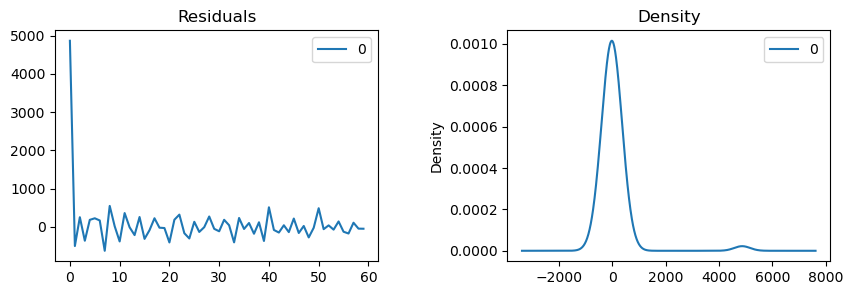

                 0
count    60.000000
mean     67.682934
std     676.342359
min    -627.138974
25%    -153.335319
50%     -24.501995
75%     182.199634
max    4865.246987
coefficient d'asymetrie: 6.205111887914283
coefficient d'aplatissement: 44.41670215419129
p-value :  5.573201676632028e-14 ,la p-value est inférieure à un niveau alpha choisi (0.05), alors l'hypothèse nulle est rejetée (i.e. il est improbable d'obtenir de telles données en supposant qu'elles soient normalement distribuées).


In [81]:
from scipy.stats import shapiro
#Plotting the residual density and estimating its distribution
residuals = pd.DataFrame(result2.resid)
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(hspace=0.3, wspace=0.4)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())
print("coefficient d'asymetrie:",residuals.skew()[0])
print("coefficient d'aplatissement:",residuals.kurt()[0])
from scipy.stats import shapiro
p_value = shapiro(residuals)[1]
if p_value <= 0.05:
    print("p-value : ",p_value, ",la p-value est inférieure à un niveau alpha choisi (0.05), alors l'hypothèse nulle est rejetée (i.e. il est improbable d'obtenir de telles données en supposant qu'elles soient normalement distribuées).")
else :
    print("p-value : ",p_value, ",la p-value est supérieure au niveau alpha choisi (0.05), alors on ne doit pas rejeter l'hypothèse nulle. La valeur de la p-value obtenue ne présuppose en rien de la nature de la distribution des données.")

In [82]:
df_test = data_te.drop(columns=(['DJU','Conso_totale','co_dju'])).copy()
df_test['cons_nodjusea'] = data_all['cons_nodjusea'].values[60:]
df_test

,cons_nodju,hw_pred,sarima_man,sarima_auto,cons_nodjusea
Date,,,,,
2019-01-01,4664.639041,4688.760963,4654.882192,4702.342866,4421.184551
2019-02-01,4365.255754,4205.737729,4282.046823,4240.262367,4571.491484
2019-03-01,4497.300470,4671.998671,4603.295928,4534.859496,4332.875604
2019-04-01,4060.280263,4131.331851,4283.785758,4045.328438,4421.154274
2019-05-01,4267.719543,4459.668659,4514.602290,4333.531681,4322.357217
2019-06-01,4537.400821,4655.547246,4589.002025,4555.959087,4356.811938
2019-07-01,4753.000000,4739.477593,4696.019665,4601.815788,4498.982083
2019-08-01,4178.605795,4269.161587,4398.810366,4191.821193,4385.792148
2019-09-01,4308.926309,4414.382074,4424.934983,4386.099667,4326.997309


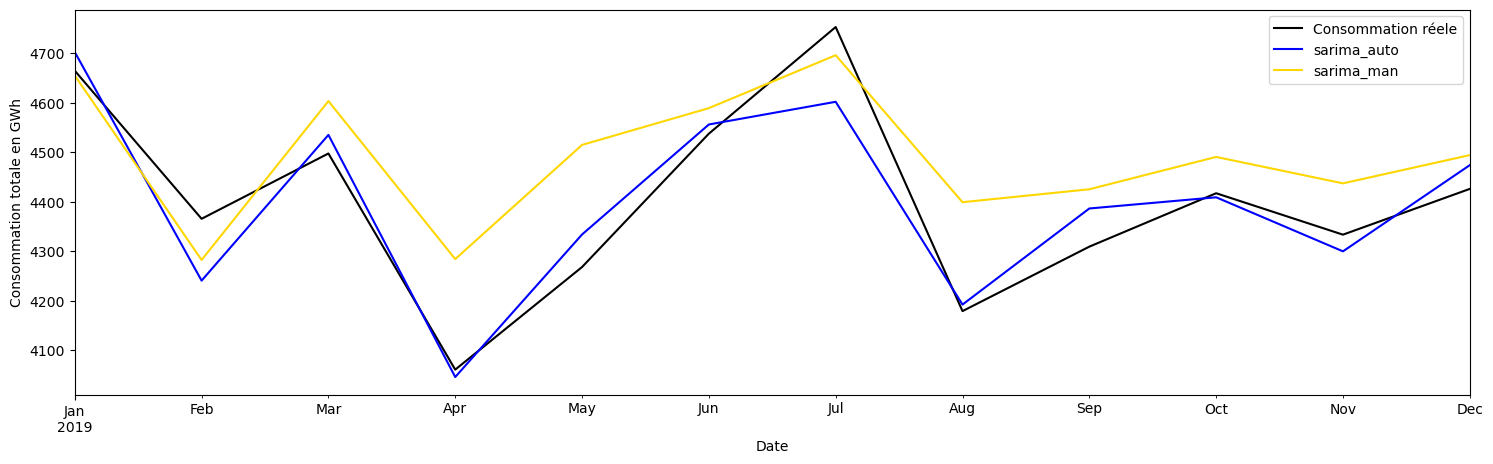

In [83]:
plt.figure(figsize=(18,5))
df_test['cons_nodju'].plot(label = 'Consommation réele',color="k")

df_test['sarima_auto'].plot(color="b")
df_test['sarima_man'].plot(color="gold")

plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.legend()
plt.savefig("SARIMA.jpg",bbox_inches ="tight")
plt.draw()

In [84]:
from sklearn.metrics import mean_squared_error
for col in df_test.columns:
    rmse = np.sqrt(mean_squared_error(df_test['cons_nodju'],df_test[col]))
    print(col , 'rmse :', rmse)

cons_nodju rmse : 0.0
hw_pred rmse : 111.16591931854059
sarima_man rmse : 134.73046088733287
sarima_auto rmse : 68.22214568127349
cons_nodjusea rmse : 187.14021867750367


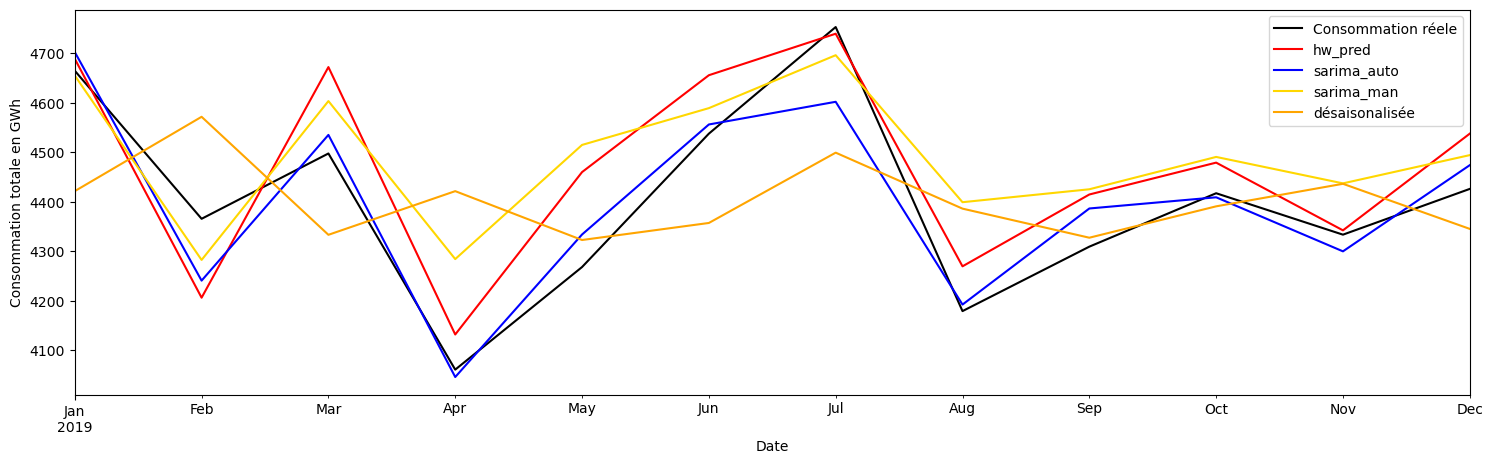

In [85]:
plt.figure(figsize=(18,5))
df_test['cons_nodju'].plot(label = 'Consommation réele',color="k")
df_test['hw_pred'].plot(color="r")
df_test['sarima_auto'].plot(color="b")
df_test['sarima_man'].plot(color="gold")
df_test['cons_nodjusea'].plot(label = 'désaisonalisée',color="orange")
plt.ylabel("Consommation totale en GWh",fontsize=10)
plt.legend()
plt.savefig("all_comp.jpg",bbox_inches ="tight")
plt.draw()